# Notebook to explore neutrino scattering (electron and muon flavor) and measure g_1, g_2, and sin^(theta_w)

In [1]:
from muon_collider_mc import *
import matplotlib.pyplot as plt

from matplotlib.colors import LogNorm

from matplotlib.pylab import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

### Setup the muon ring parameters and detector dimensions

* Muon energy: 1.5e6 MeV or 1.5 TeV
* Detector distance: 200.0 meters
* N_muons: 2.16e20 in 1 year

In [2]:
event_gen = NeutronFluxMuonRing(Emu=1.5e6, ring_radius=1000.0, N_muons=2.16e20, det_dist=200.0,
                                det_area=25.0, det_length=10.0, det_mat=Material("Ar"))

### Plot the electron recoil spectrum with the default value of Sin^2(theta_w)

In [4]:
# 100 MeV threshold up to 100 GeV
er_bins = np.linspace(1e2, 1e6, 50)
er_centers = (er_bins[1:] + er_bins[:-1])/2

mu_weights, e_weights = event_gen.eves_event_rate(er_bins, n_subsamples=500)

100%|██████████| 49/49 [00:26<00:00,  1.82it/s]


### vs weighted MC method

In [5]:
event_gen.eves_weighted_mc_sim(er_bins, n_samples=500000, n_subsamples=20)

100%|██████████| 500000/500000 [00:52<00:00, 9543.37it/s] 


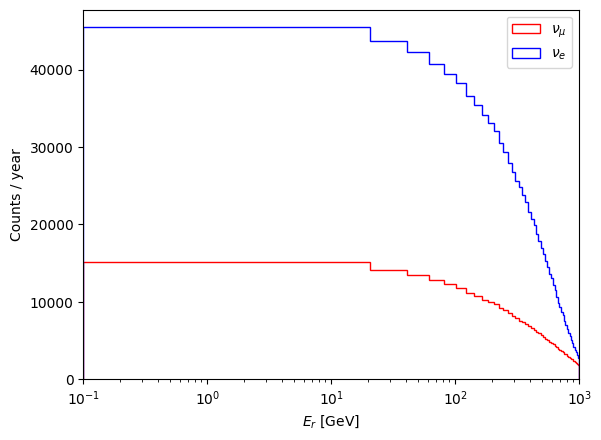

In [6]:

plt.hist(1e-3*er_centers, weights=mu_weights, bins=1e-3*er_bins, color='r', label=r"$\nu_\mu$", histtype='step')
plt.hist(1e-3*er_centers, weights=e_weights, bins=1e-3*er_bins, color='b', label=r"$\nu_e$", histtype='step')
#plt.hist(1e-3*np.array(event_gen.el_energies), weights=event_gen.el_weights_numu, bins=1e-3*er_bins,
#         label=r"$\nu_\mu$", histtype='step', ls='dashed', color='r')
#plt.hist(1e-3*np.array(event_gen.el_energies), weights=event_gen.el_weights_nue, bins=1e-3*er_bins,
#         label=r"$\nu_e$", histtype='step', ls='dashed', color='b')
plt.xlim((er_bins[0]*1e-3, 1e-3*er_bins[-1]))
plt.xscale('log')
#plt.yscale('log')
plt.legend()
plt.xlabel(r"$E_r$ [GeV]")
plt.ylabel("Counts / year")
plt.show()

In [1]:
plt.hist(1e-3*er_centers, weights=mu_weights, bins=1e-3*er_bins, color='r', label=r"$\nu_\mu$", histtype='step', density=True)
plt.hist(1e-3*er_centers, weights=e_weights, bins=1e-3*er_bins, color='b', label=r"$\nu_e$", histtype='step', density=True)
plt.hist(1e-3*np.array(event_gen.el_energies), weights=event_gen.el_weights_numu, bins=1e-3*er_bins, histtype='step',
         ls='dashed', color='r', density=True)
plt.hist(1e-3*np.array(event_gen.el_energies), weights=event_gen.el_weights_nue, bins=1e-3*er_bins, histtype='step',
         ls='dashed', color='b', density=True)
plt.xlim((er_bins[0]*1e-3, 1e-3*er_bins[-1]))
plt.legend()
plt.xlabel(r"$E_r$ [GeV]")
plt.ylabel("a.u.")
plt.yscale('log')
plt.show()

NameError: name 'plt' is not defined

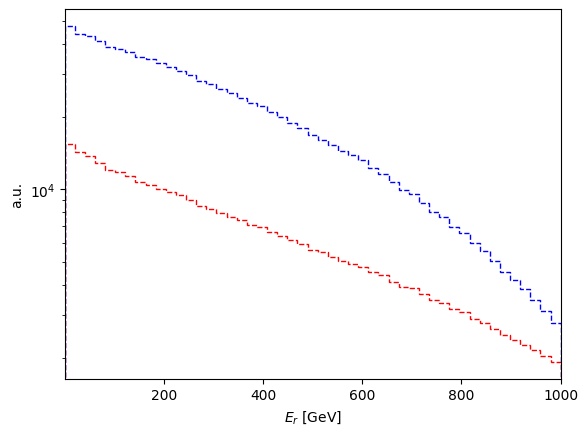

In [8]:
#plt.hist(1e-3*er_centers, weights=mu_weights, bins=1e-3*er_bins, color='r', label="$\nu_\mu$", histtype='step', density=True)
#plt.hist(1e-3*er_centers, weights=e_weights, bins=1e-3*er_bins, color='b', label="$\nu_e$", histtype='step', density=True)
plt.hist(1e-3*np.array(event_gen.el_energies), weights=event_gen.el_weights_numu, bins=1e-3*er_bins, histtype='step', ls='dashed', color='r')
plt.hist(1e-3*np.array(event_gen.el_energies), weights=event_gen.el_weights_nue, bins=1e-3*er_bins, histtype='step', ls='dashed', color='b')
plt.xlim((er_bins[0]*1e-3, 1e-3*er_bins[-1]))
plt.xlabel(r"$E_r$ [GeV]")
plt.ylabel("a.u.")
plt.yscale('log')
plt.show()

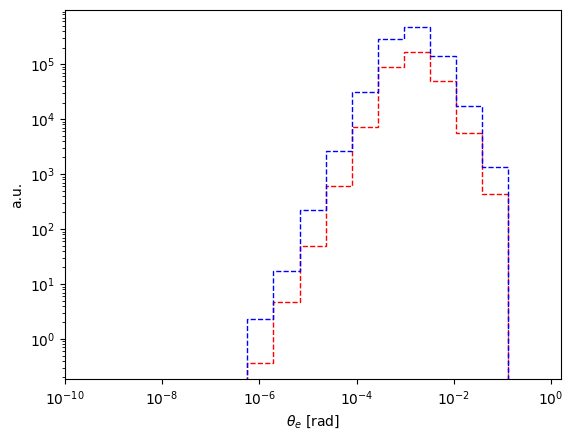

In [9]:
theta_bins = np.logspace(-10, np.log10(pi/2), 20)
plt.hist(np.array(event_gen.el_thetas), weights=event_gen.el_weights_numu, bins=theta_bins, histtype='step', ls='dashed', color='r')
plt.hist(np.array(event_gen.el_thetas), weights=event_gen.el_weights_nue, bins=theta_bins, histtype='step', ls='dashed', color='b')
plt.xlim((theta_bins[0], theta_bins[-1]))
plt.xscale('log')
plt.xlabel(r"$\theta_{e}$ [rad]")
plt.ylabel("a.u.")
plt.yscale('log')
plt.show()

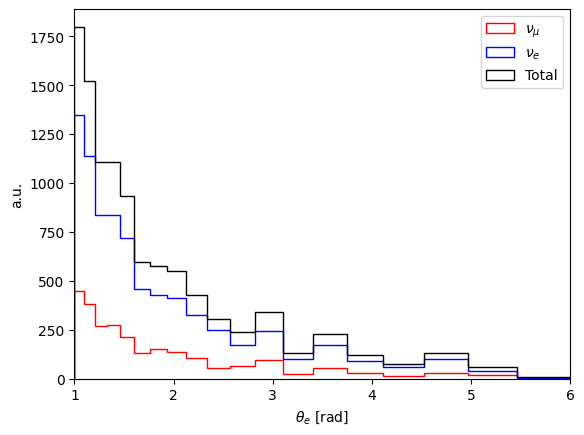

In [10]:
theta_bins = np.logspace(0, np.log10(6.0), 20)
rad2deg = 180.0/np.pi
plt.hist(rad2deg*np.array(event_gen.el_thetas), weights=event_gen.el_weights_numu, bins=theta_bins,
         label=r"$\nu_\mu$", histtype='step', color='r')
plt.hist(rad2deg*np.array(event_gen.el_thetas), weights=event_gen.el_weights_nue, bins=theta_bins,
         label=r"$\nu_e$", histtype='step', color='b')
total_weights = np.array(event_gen.el_weights_nue) + np.array(event_gen.el_weights_numu)
plt.hist(rad2deg*np.array(event_gen.el_thetas), weights=total_weights, bins=theta_bins,
         label=r"Total", histtype='step', color='k')
plt.xlim((theta_bins[0], theta_bins[-1]))
#plt.xscale('log')
plt.xlabel(r"$\theta_{e}$ [rad]")
plt.ylabel("a.u.")
plt.legend()
#plt.yscale('log')
plt.show()

# Using Precalculated Flux (sqrt(s) = 3 TeV)

In [2]:
precalc_nue_flux = np.genfromtxt("data/nue_flux_MeV_rad_216e19Mu_25m2_by_10m_det_200m.txt")
precalc_numu_flux = np.genfromtxt("data/numu_flux_MeV_rad_216e19Mu_25m2_by_10m_det_200m.txt")

In [4]:
eves_gen_nuebar = EvESFromNeutrinoFlux(nu_flux=precalc_nue_flux, flavor="ebar", detector_material=Material("Ar"),
                                    detector_length=10.0, weak_mixing_angle_squared=SSW)
eves_gen_numu = EvESFromNeutrinoFlux(nu_flux=precalc_numu_flux, flavor="mu", detector_material=Material("Ar"),
                                    detector_length=10.0, weak_mixing_angle_squared=SSW)

In [5]:
eves_gen_nuebar.simulate_eves_rectangle_rule(n_samples=500)
eves_gen_numu.simulate_eves_rectangle_rule(n_samples=500)

print("TOTAL nuebar events = ", np.sum(eves_gen_nuebar.el_weights))
print("TOTAL numu events = ", np.sum(eves_gen_numu.el_weights))

nuebar_energies, nuebar_thetas, nuebar_phis, nuebar_wgts = eves_gen_nuebar.get_energy_theta_phi_wgt_arrays()
numu_energies, numu_thetas, numu_phis, numu_wgts = eves_gen_numu.get_energy_theta_phi_wgt_arrays()

eves_gen_nuebar.simulate_eves_rectangle_rule(n_samples=500, gL_mod=0.9, gR_mod=1.05)
eves_gen_numu.simulate_eves_rectangle_rule(n_samples=500, gL_mod=0.9, gR_mod=1.05)

nuebar_energies_2, nuebar_thetas_2, nuebar_phis_2, nuebar_wgts_2 = eves_gen_nuebar.get_energy_theta_phi_wgt_arrays()
numu_energies_2, numu_thetas_2, numu_phis_2, numu_wgts_2 = eves_gen_numu.get_energy_theta_phi_wgt_arrays()

TOTAL nuebar events =  407871.05834077706
TOTAL numu events =  338482.0521939185


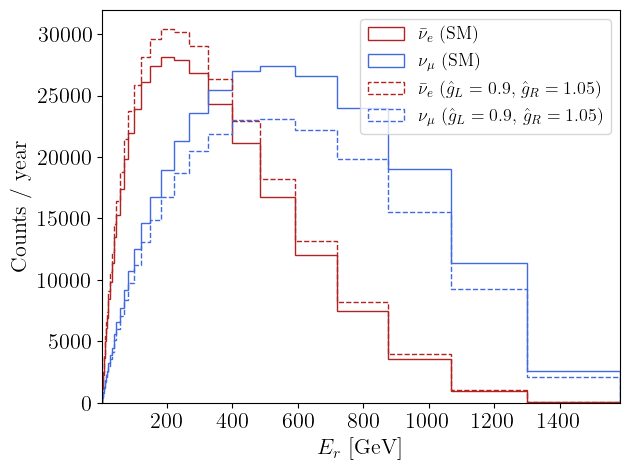

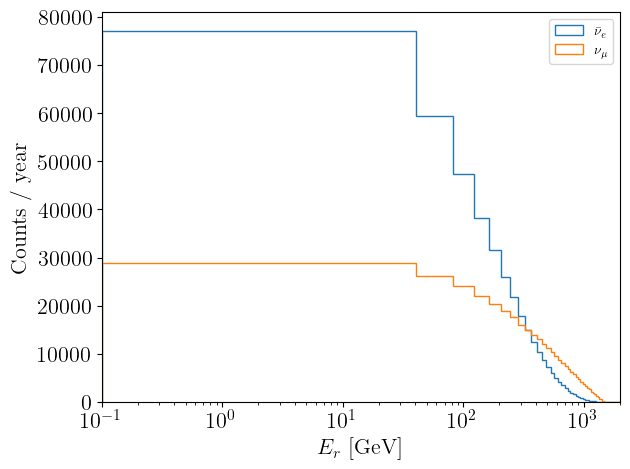

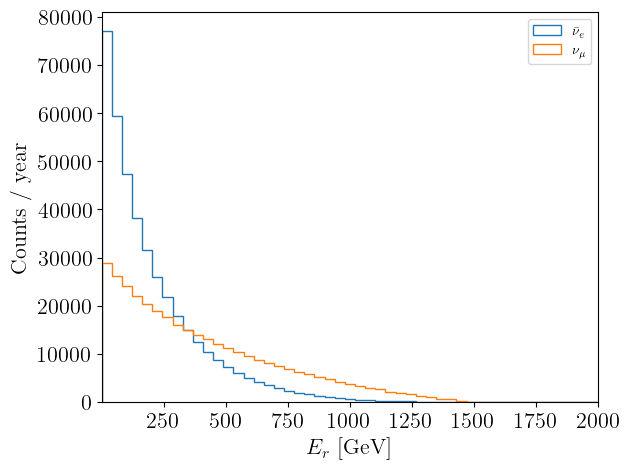

In [5]:
er_bins = np.logspace(-1, 3.2, 50)  # GeV

plt.hist(1e-3*nuebar_energies, weights=nuebar_wgts, bins=er_bins, histtype='step',
         label=r"$\bar{\nu}_e$ (SM)", color='firebrick')
plt.hist(1e-3*numu_energies, weights=numu_wgts, bins=er_bins, histtype='step',
         label=r"$\nu_\mu$ (SM)", color='royalblue')

plt.hist(1e-3*nuebar_energies_2, weights=nuebar_wgts_2, bins=er_bins, histtype='step',
         label=r"$\bar{\nu}_e$ ($\hat{g}_L = 0.9$, $\hat{g}_R = 1.05$)", color='firebrick', ls='dashed')
plt.hist(1e-3*numu_energies_2, weights=numu_wgts_2, bins=er_bins, histtype='step',
         label=r"$\nu_\mu$ ($\hat{g}_L = 0.9$, $\hat{g}_R = 1.05$)", color='royalblue', ls='dashed')

plt.legend(fontsize=13)
plt.xlabel(r"$E_r$ [GeV]", fontsize=16)
plt.ylabel("Counts / year", fontsize=16)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.xlim((er_bins[0], er_bins[-1]))
plt.tight_layout()
plt.savefig("plots/mu_minus_decay_EvES_energy_spectrum.pdf")
plt.show()

er_bins = np.linspace(1e-1, 2e3, 50)
plt.hist(1e-3*nuebar_energies, weights=nuebar_wgts, bins=er_bins, histtype='step', label=r"$\bar{\nu}_e$")
plt.hist(1e-3*numu_energies, weights=numu_wgts, bins=er_bins, histtype='step', label=r"$\nu_\mu$")
plt.xscale('log')
plt.xlabel(r"$E_r$ [GeV]", fontsize=16)
plt.ylabel("Counts / year", fontsize=16)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.xlim((er_bins[0], er_bins[-1]))
plt.legend()
plt.tight_layout()
plt.show()

plt.hist(1e-3*nuebar_energies, weights=nuebar_wgts, bins=er_bins, histtype='step', label=r"$\bar{\nu}_e$")
plt.hist(1e-3*numu_energies, weights=numu_wgts, bins=er_bins, histtype='step', label=r"$\nu_\mu$")
plt.xlabel(r"$E_r$ [GeV]", fontsize=16)
plt.ylabel("Counts / year", fontsize=16)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.xlim((er_bins[0], er_bins[-1]))
plt.legend()
plt.tight_layout()
plt.show()

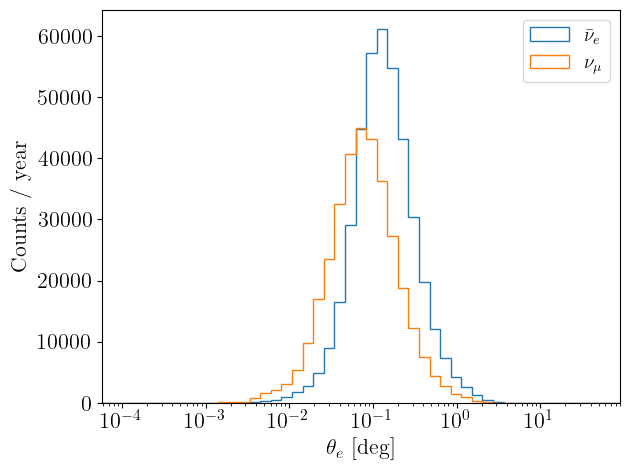

In [8]:
rad2deg = 180.0/np.pi

# log bins
theta_bins = rad2deg*np.logspace(-6, np.log10(pi/2), 50)

plt.hist(rad2deg*nuebar_thetas, weights=nuebar_wgts, bins=theta_bins, histtype='step', label=r"$\bar{\nu}_e$")
plt.hist(rad2deg*numu_thetas, weights=numu_wgts, bins=theta_bins, histtype='step', label=r"$\nu_\mu$")
plt.legend(fontsize=14)
plt.xscale('log')
plt.xlabel(r"$\theta_e$ [deg]", fontsize=16)
plt.ylabel("Counts / year", fontsize=16)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.xlim((theta_bins[0], theta_bins[-1]))
plt.tight_layout()
plt.show()



### 2d Plots and the CCQE line

/home/thompson/.local/lib/python3.10/site-packages/numpy/core/function_base.py:277: RuntimeWarning: overflow encountered in power
  return _nx.power(base, y)


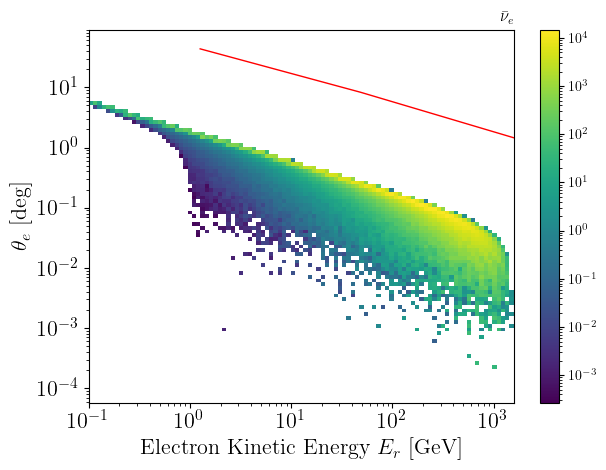

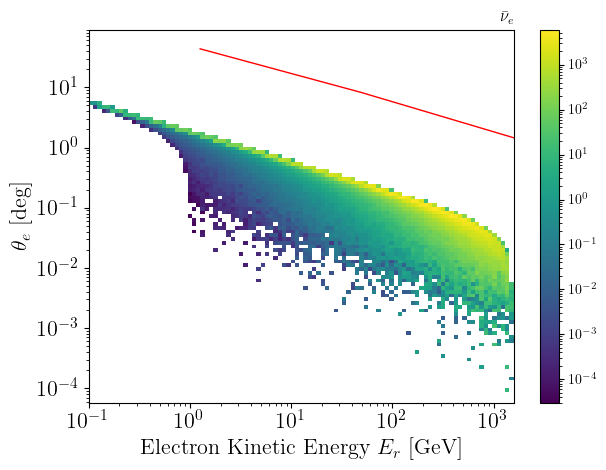

In [24]:
er_bins_2d = np.logspace(-1, 3.2, 100)  # FeV
theta_bins_2d = rad2deg*np.logspace(-6, np.log10(pi/2), 100)

# get line where Ee theta_e^2 = 2 me
Ee_vals = np.logspace(er_bins_2d[0], er_bins_2d[-1], 1000)
theta_e_vals = rad2deg*sqrt(2*M_E/(Ee_vals+M_E))  # adjusted for KE -> total energy

plt.hist2d(1e-3*nuebar_energies, rad2deg*nuebar_thetas, weights=nuebar_wgts, bins=[er_bins_2d, theta_bins_2d], norm=LogNorm())
plt.plot(Ee_vals, theta_e_vals, color='r', linewidth=1.0)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r"Electron Kinetic Energy $E_r$ [GeV]", fontsize=16)
plt.ylabel(r"$\theta_e$ [deg]", fontsize=16)
plt.title(r"$\bar{\nu}_e$", fontsize=12, loc="right")
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.colorbar()
plt.xlim((er_bins_2d[0], er_bins_2d[-1]))
plt.ylim((theta_bins_2d[0], theta_bins_2d[-1]))
plt.tight_layout()
plt.show()

plt.hist2d(1e-3*numu_energies, rad2deg*numu_thetas, weights=numu_wgts, bins=[er_bins_2d, theta_bins_2d], norm=LogNorm())
plt.plot(Ee_vals, theta_e_vals, color='r', linewidth=1.0)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r"Electron Kinetic Energy $E_r$ [GeV]", fontsize=16)
plt.ylabel(r"$\theta_e$ [deg]", fontsize=16)
plt.title(r"$\bar{\nu}_e$", fontsize=12, loc="right")
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.colorbar()
plt.xlim((er_bins_2d[0], er_bins_2d[-1]))
plt.ylim((theta_bins_2d[0], theta_bins_2d[-1]))
plt.tight_layout()
plt.show()

# Can we tell that nu_mu is there?

* Null hypothesis: nuebar only
* test hypothesis: nuebar + numu

56251.96058847821
5.420098927519786e-15 1.1061426382693441e-16


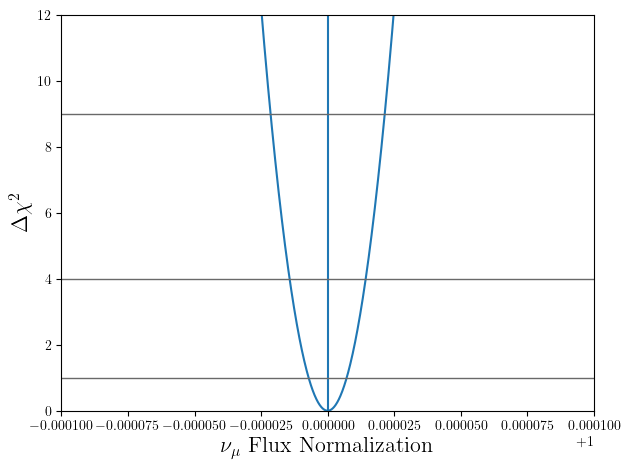

In [8]:
er_bins = np.logspace(-1, 3.2, 50)  # GeV

# Null
nuebar_spectrum = np.histogram(1e-3*nuebar_energies, weights=nuebar_energies, bins=er_bins)[0] 
numu_spectrum = np.histogram(1e-3*numu_energies, weights=numu_energies, bins=er_bins)[0]

fake_data = nuebar_spectrum + numu_spectrum
print(min(fake_data))

# Test
flux_norm = np.arange(0.999, 1.001, 0.0000001)
chi2_vals = []

for f in flux_norm:
    signal_hyp = numu_spectrum*f + nuebar_spectrum
    chi2 = np.sum((signal_hyp - fake_data)**2 / (fake_data))
    chi2_vals.append(chi2)

print(np.min(chi2_vals), np.min(chi2_vals)/49)

delta_chi2 = np.array(chi2_vals) - np.min(chi2_vals)

plt.plot(flux_norm, chi2_vals)
plt.vlines(x=1.0, ymin=0.0, ymax=12.0)
plt.ylim((0.0, 12.0))
plt.xlim((0.9999, 1.0001))
plt.ylabel(r"$\Delta\chi^2$", fontsize=16)
plt.xlabel(r"$\nu_\mu$ Flux Normalization", fontsize=16)
plt.hlines(y=1.0, xmin=0.0, xmax=2.0, color='dimgray', linewidth=1.0)
plt.hlines(y=4.0, xmin=0.0, xmax=2.0, color='dimgray', linewidth=1.0)
plt.hlines(y=9.0, xmin=0.0, xmax=2.0, color='dimgray', linewidth=1.0)
plt.tight_layout()
plt.show()


# Coupling Scan

* Draw random gL, gR normalizations
* can translate back into gV, gA later

In [52]:
# gL, gR values

gL_grid = np.arange(0.93, 1.07, 0.002)
gR_grid = np.arange(0.93, 1.07, 0.002)

er_bins = np.logspace(-1, 3.2, 50)  # GeV

# Null
nuebar_spectrum = np.histogram(1e-3*nuebar_energies, weights=nuebar_wgts, bins=er_bins)[0] 
numu_spectrum = np.histogram(1e-3*numu_energies, weights=numu_wgts, bins=er_bins)[0]
null_hypothesis_spectrum = numu_spectrum + nuebar_spectrum


eves_gen_nuebar = EvESFromNeutrinoFlux(nu_flux=precalc_nue_flux, flavor="ebar", detector_material=Material("Ar"),
                                    detector_length=10.0, weak_mixing_angle_squared=SSW)
eves_gen_numu = EvESFromNeutrinoFlux(nu_flux=precalc_numu_flux, flavor="mu", detector_material=Material("Ar"),
                                    detector_length=10.0, weak_mixing_angle_squared=SSW)

gL_list = []
gR_list = []
chi2_list = []
for gL in gL_grid:
    print("On gL = ", gL)
    for gR in gR_grid:
        eves_gen_nuebar.simulate_eves_rectangle_rule(n_samples=100, gL_mod=gL, gR_mod=gR)
        eves_gen_numu.simulate_eves_rectangle_rule(n_samples=100, gL_mod=gL, gR_mod=gR)

        this_nuebar_e, this_nuebar_thetas, this_nuebar_phis, this_nuebar_wgts = eves_gen_nuebar.get_energy_theta_phi_wgt_arrays()
        this_numu_e, this_numu_thetas, this_numu_phis, this_numu_wgts = eves_gen_numu.get_energy_theta_phi_wgt_arrays()

        signal_spectrum = np.histogram(1e-3*this_nuebar_e, weights=this_nuebar_wgts, bins=er_bins)[0] \
                            + np.histogram(1e-3*this_numu_e, weights=this_numu_wgts, bins=er_bins)[0]
        
        chi2 = np.sum((signal_spectrum - null_hypothesis_spectrum)**2 / null_hypothesis_spectrum)

        chi2_list.append(chi2)
        gL_list.append(gL)
        gR_list.append(gR)

gL_list = np.array(gL_list)
gR_list = np.array(gR_list)
chi2_list = np.array(chi2_list)




On gL =  0.93
On gL =  0.932
On gL =  0.934
On gL =  0.936
On gL =  0.9380000000000001
On gL =  0.9400000000000001
On gL =  0.9420000000000001
On gL =  0.9440000000000001
On gL =  0.9460000000000001
On gL =  0.9480000000000001
On gL =  0.9500000000000001
On gL =  0.9520000000000001
On gL =  0.9540000000000001
On gL =  0.9560000000000001
On gL =  0.9580000000000001
On gL =  0.9600000000000001
On gL =  0.9620000000000001
On gL =  0.9640000000000001
On gL =  0.9660000000000001
On gL =  0.9680000000000001
On gL =  0.9700000000000001
On gL =  0.9720000000000001
On gL =  0.9740000000000001
On gL =  0.9760000000000001
On gL =  0.9780000000000001
On gL =  0.9800000000000001
On gL =  0.9820000000000001
On gL =  0.9840000000000001
On gL =  0.9860000000000001
On gL =  0.9880000000000001
On gL =  0.9900000000000001
On gL =  0.9920000000000001
On gL =  0.9940000000000001
On gL =  0.9960000000000001
On gL =  0.9980000000000001
On gL =  1.0
On gL =  1.0020000000000002
On gL =  1.004
On gL =  1.006000

### Show the contours on c_L vs c_R

In [45]:
# import existing limits
charm2_gv_ga = np.genfromtxt("limits/CHARM2_p1.txt")
texono_gv_ga = np.genfromtxt("limits/TEXONO_p1.txt")
dune_prism_gv_ga = np.genfromtxt("limits/DUNE_PRISM_nue_p1.txt")

70
(4900,)
0.0


/tmp/ipykernel_52224/1916344420.py:10: UserWarning: The following kwargs were not used by contour: 'algorithm'
  c = plt.contour(GL_MOD, GR_MOD, CHI2, levels=[2.3, 6.18, 11.83], colors=['b','cornflowerblue', 'lightsteelblue'],


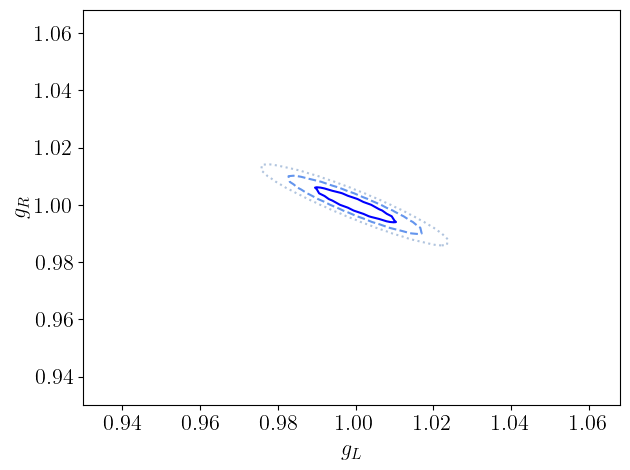

/tmp/ipykernel_52224/1916344420.py:25: UserWarning: The following kwargs were not used by contour: 'algorithm'
  c = plt.contour(GL, GR, CHI2, levels=[2.3, 6.18, 11.83], colors=['b','cornflowerblue', 'lightsteelblue'],


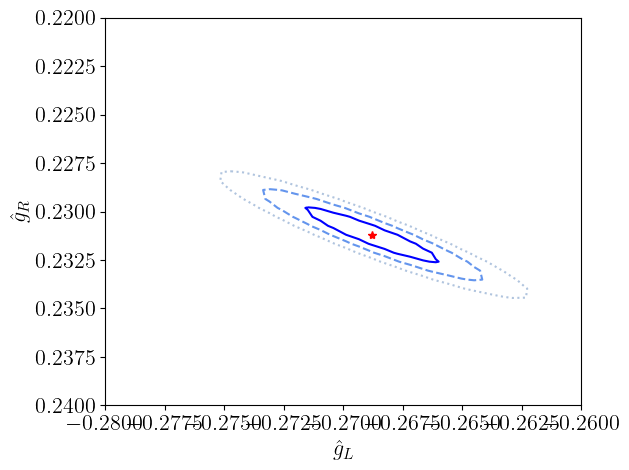

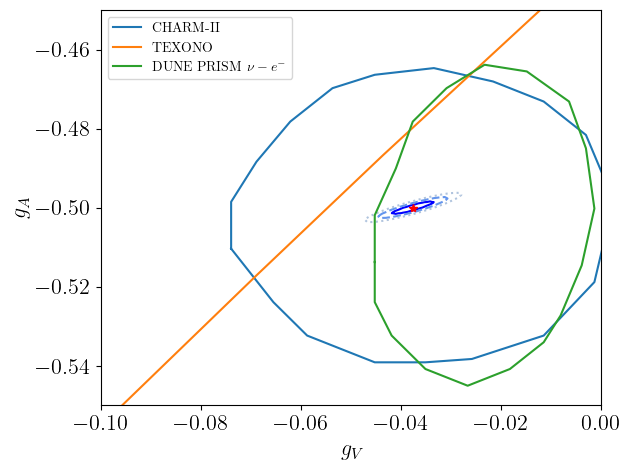

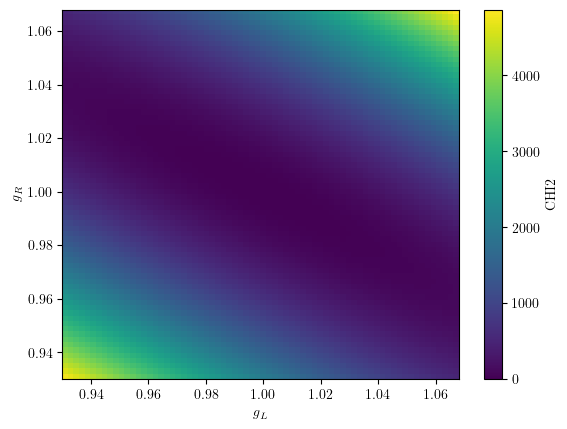

In [53]:
GL_MOD, GR_MOD = np.meshgrid(gL_grid, gR_grid)

print(gL_grid.shape[0])
print(chi2_list.shape)

CHI2 = np.reshape(chi2_list, (gL_grid.shape[0], gR_grid.shape[0])).transpose()

print(np.min(chi2_list))

c = plt.contour(GL_MOD, GR_MOD, CHI2, levels=[2.3, 6.18, 11.83], colors=['b','cornflowerblue', 'lightsteelblue'],
            linestyles=['solid', 'dashed', 'dotted'], algorithm='serial')
plt.ylabel(r"$g_R$", fontsize=16)
plt.xlabel(r"$g_L$", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()
plt.close()


# Transform to absolute values:
GL = GL_MOD * (SSW - 0.5)
GR = GR_MOD * (SSW)

c = plt.contour(GL, GR, CHI2, levels=[2.3, 6.18, 11.83], colors=['b','cornflowerblue', 'lightsteelblue'],
            linestyles=['solid', 'dashed', 'dotted'], algorithm='serial')

"""
# for trimming noisy contours
for level in c.collections:
    for kp,path in reversed(list(enumerate(level.get_paths()))):
        # go in reversed order due to deletions!

        # include test for "smallness" of your choice here:
        # I'm using a simple estimation for the diameter based on the
        #    x and y diameter...
        verts = path.vertices # (N,2)-shape array of contour line coordinates
        diameter = np.max(verts.max(axis=0) - verts.min(axis=0))

        if diameter<0.01: # threshold to be refined for your actual dimensions!
            del(level.get_paths()[kp])  # no remove() for Path objects:(
"""
            
# Plot SM point
plt.plot(SSW-0.5, SSW, marker='*', color='r')

plt.ylabel(r"$\hat{g}_R$", fontsize=16)
plt.xlabel(r"$\hat{g}_L$", fontsize=16)
plt.ylim((0.24,0.22))
plt.xlim((-0.28, -0.26))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()
plt.close()


# Show them as a function of gV, gA
CV = (GL + GR)
CA = (GL - GR)

plt.contour(CV, CA, CHI2, levels=[2.3, 6.18, 11.83], colors=['b','cornflowerblue', 'lightsteelblue'],
            linestyles=['solid', 'dashed', 'dotted'])
plt.plot(2*SSW-0.5, -0.5, marker='*', color='r')

# plot existing limits
plt.plot(charm2_gv_ga[:,0], charm2_gv_ga[:,1], label="CHARM-II")
plt.plot(texono_gv_ga[:,0], texono_gv_ga[:,1], label="TEXONO")
plt.plot(dune_prism_gv_ga[:,0], dune_prism_gv_ga[:,1], label=r"DUNE PRISM $\nu - e^-$")

plt.ylabel(r"$g_A$", fontsize=16)
plt.xlabel(r"$g_V$", fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend()
plt.ylim((-0.55,-0.45))
plt.xlim((-0.1, 0.0))
plt.tight_layout()
plt.savefig("plots/sensitivity_gV_gA_3TeV_20240820.pdf")
plt.show()
plt.close()

plt.imshow(CHI2-min(chi2_list), extent=[gL_grid.min(), gL_grid.max(), gR_grid.min(), gR_grid.max()], 
           origin='lower', aspect='auto', cmap='viridis')
plt.colorbar(label='CHI2')

# Adding labels to the axes
plt.xlabel(r'$g_L$')
plt.ylabel(r'$g_R$')

# Display the plot
plt.show()


# Sin^2(θw) measurement

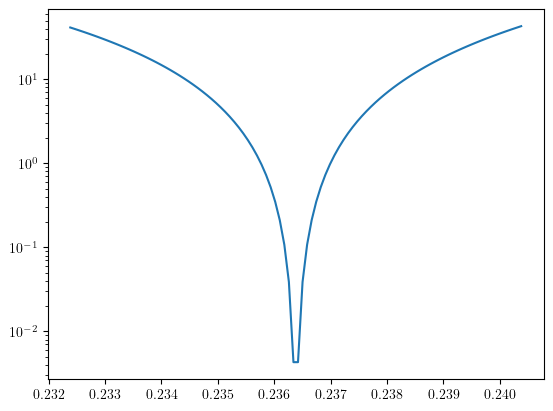

In [19]:
# scan over sin^2(theta_W)

SSW_AT_1GEV = 0.23638198757763973

sw2_test_pts = SSW_AT_1GEV + np.linspace(-0.004, 0.004, 100)


er_bins = np.logspace(-1, 3.2, 50)  # GeV


eves_gen_nuebar = EvESFromNeutrinoFlux(nu_flux=precalc_nue_flux, flavor="ebar", detector_material=Material("Ar"),
                                    detector_length=10.0, weak_mixing_angle_squared=SSW_AT_1GEV)
eves_gen_numu = EvESFromNeutrinoFlux(nu_flux=precalc_numu_flux, flavor="mu", detector_material=Material("Ar"),
                                    detector_length=10.0, weak_mixing_angle_squared=SSW_AT_1GEV)

eves_gen_nuebar.simulate_eves_rectangle_rule(n_samples=100)
eves_gen_numu.simulate_eves_rectangle_rule(n_samples=100)

this_nuebar_e, this_nuebar_thetas, this_nuebar_phis, this_nuebar_wgts = eves_gen_nuebar.get_energy_theta_phi_wgt_arrays()
this_numu_e, this_numu_thetas, this_numu_phis, this_numu_wgts = eves_gen_numu.get_energy_theta_phi_wgt_arrays()

# Null
nuebar_spectrum = np.histogram(1e-3*this_nuebar_e, weights=this_nuebar_wgts, bins=er_bins)[0] 
numu_spectrum = np.histogram(1e-3*this_numu_e, weights=this_numu_wgts, bins=er_bins)[0]
null_hypothesis_spectrum = numu_spectrum + nuebar_spectrum


sw2_list = []
chi2_list = []
for sw2 in sw2_test_pts:
    eves_gen_nuebar.sw2 = sw2
    eves_gen_numu.sw2 = sw2
    eves_gen_nuebar.simulate_eves_rectangle_rule(n_samples=100)
    eves_gen_numu.simulate_eves_rectangle_rule(n_samples=100)

    this_nuebar_e, this_nuebar_thetas, this_nuebar_phis, this_nuebar_wgts = eves_gen_nuebar.get_energy_theta_phi_wgt_arrays()
    this_numu_e, this_numu_thetas, this_numu_phis, this_numu_wgts = eves_gen_numu.get_energy_theta_phi_wgt_arrays()

    signal_spectrum = np.histogram(1e-3*this_nuebar_e, weights=this_nuebar_wgts, bins=er_bins)[0] \
                        + np.histogram(1e-3*this_numu_e, weights=this_numu_wgts, bins=er_bins)[0]
    
    chi2 = np.sum((signal_spectrum - null_hypothesis_spectrum)**2 / null_hypothesis_spectrum)

    chi2_list.append(chi2)
    sw2_list.append(sw2)

sw2_list = np.array(sw2_list)
chi2_list = np.array(chi2_list)



plt.plot(sw2_list, chi2_list)
plt.yscale('log')
plt.show()


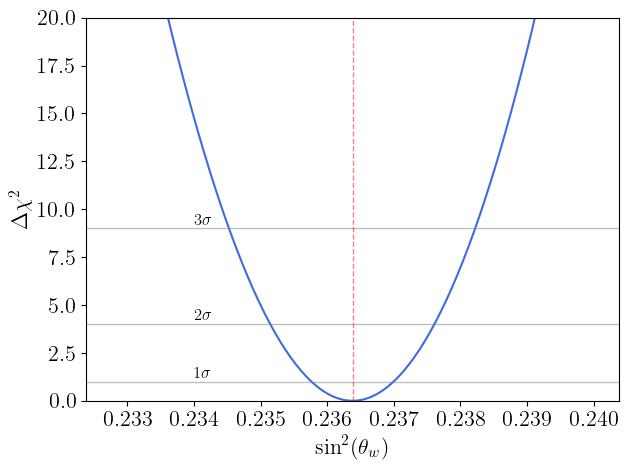

In [28]:
plt.plot(sw2_list, chi2_list, color='royalblue')

# draw 1, 2, 3 sigma lines
plt.hlines(y=1.0, xmin=min(sw2_list), xmax=max(sw2_list), color='gray', linewidth=1.0, alpha=0.5)
plt.hlines(y=4.0, xmin=min(sw2_list), xmax=max(sw2_list), color='gray', linewidth=1.0, alpha=0.5)
plt.hlines(y=9.0, xmin=min(sw2_list), xmax=max(sw2_list), color='gray', linewidth=1.0, alpha=0.5)

plt.text(0.234, 1.2, r"$1\sigma$", fontsize=12)
plt.text(0.234, 4.2, r"$2\sigma$", fontsize=12)
plt.text(0.234, 9.2, r"$3\sigma$", fontsize=12)


plt.vlines(x=SSW_AT_1GEV, ymin=0.0, ymax=20.0, color='r', linewidth=1.0, ls='dashed', alpha=0.5)
plt.ylim((0.0, 20.0))
plt.xlim((min(sw2_list),max(sw2_list)))
plt.xlabel(r"$\sin^2 (\theta_w)$", fontsize=16)
plt.ylabel(r"$\Delta\chi^2$", fontsize=16)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.tight_layout()

plt.savefig("plots/weak_mixing/WMA_deltaChi2_3TeV_SR.pdf")

plt.show()

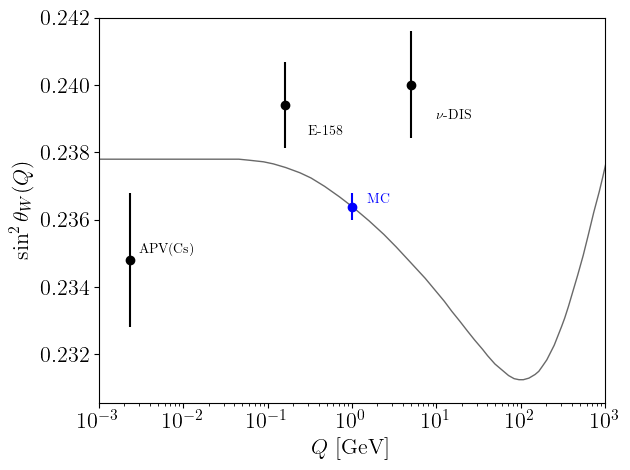

In [27]:
sw2_dat = np.genfromtxt("data/sw2_theory_curve_Q2.txt")

mucol_1sigma_sw2_vals = [SSW_AT_1GEV]
mucol_1sigma_Q2_vals = [1.0]
mucol_1sigma_Q2_err = [0.0004]

nuDIS = [5.0, 0.24, 0.00159]
E158 = [0.16, 0.2394, 0.00128]
APV = [2.35e-3, 0.2348, 0.002]

plt.plot(sw2_dat[:,0], sw2_dat[:,1], color='dimgray', linewidth=1.0)
plt.errorbar(mucol_1sigma_Q2_vals, mucol_1sigma_sw2_vals, yerr=mucol_1sigma_Q2_err, color='b', marker='o', ls='none')
plt.errorbar(nuDIS[0], nuDIS[1], yerr=nuDIS[2], color='k', marker='o', ls='none')
plt.errorbar(E158[0], E158[1], yerr=E158[2], color='k', marker='o', ls='none')
plt.errorbar(APV[0], APV[1], yerr=APV[2], color='k', marker='o', ls='none')

# text labels
plt.text(3e-3, 0.235, "APV(Cs)")
plt.text(3e-1, 0.2385, "E-158")
plt.text(10.0, 0.239, r"$\nu$-DIS")
plt.text(1.5, 0.2365, r"MC", color="b")

plt.xscale('log')
plt.xlabel(r"$Q$ [GeV]", fontsize=16)
plt.ylabel(r"$\sin^2 \theta_W (Q)$", fontsize=16)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.ylim(top=0.242)
plt.xlim((1e-3, 1e3))
plt.tight_layout()

plt.savefig("plots/weak_mixing/WMA_by_Q_3TeV_SR.pdf")

plt.show()



# Generate sqrt(s) = 500 GeV, 3 TeV, and 10 TeV fluxes

In [2]:
# Load the precalculated fluxes
numu_flux_500GeV = np.genfromtxt("data/numu_flux_MeV_rad_SqrtS-500GeV_216e19Mu_25m2_by_10m_200m.txt")
nue_flux_500GeV = np.genfromtxt("data/nuebar_flux_MeV_rad_SqrtS-500GeV_216e19Mu_25m2_by_10m_200m.txt")

numu_flux_3TeV = np.genfromtxt("data/numu_flux_MeV_rad_SqrtS-3TeV_216e19Mu_25m2_by_10m_200m.txt")
nue_flux_3TeV = np.genfromtxt("data/nuebar_flux_MeV_rad_SqrtS-3TeV_216e19Mu_25m2_by_10m_200m.txt")

numu_flux_10TeV = np.genfromtxt("data/numu_flux_MeV_rad_SqrtS-10TeV_216e19Mu_25m2_by_10m_200m.txt")
nue_flux_10TeV = np.genfromtxt("data/nuebar_flux_MeV_rad_SqrtS-10TeV_216e19Mu_25m2_by_10m_200m.txt")

In [3]:
SSW_AT_1GEV = 0.23638198757763973
N_SAMPLES = 500

# sqrt(s) = 500 GeV
eves_gen_nuebar_500 = EvESFromNeutrinoFlux(nu_flux=nue_flux_500GeV, flavor="ebar", detector_material=Material("Ar"),
                                    detector_length=10.0, weak_mixing_angle_squared=SSW_AT_1GEV)
eves_gen_numu_500 = EvESFromNeutrinoFlux(nu_flux=numu_flux_500GeV, flavor="mu", detector_material=Material("Ar"),
                                    detector_length=10.0, weak_mixing_angle_squared=SSW_AT_1GEV)
eves_gen_nuebar_500.simulate_eves_rectangle_rule(n_samples=N_SAMPLES)
eves_gen_numu_500.simulate_eves_rectangle_rule(n_samples=N_SAMPLES)
nuebar_energies_500, _, _, nuebar_wgts_500 = eves_gen_nuebar_500.get_energy_theta_phi_wgt_arrays()
numu_energies_500, _, _, numu_wgts_500 = eves_gen_numu_500.get_energy_theta_phi_wgt_arrays()

eves_gen_nue_500 = EvESFromNeutrinoFlux(nu_flux=nue_flux_500GeV, flavor="e", detector_material=Material("Ar"),
                                    detector_length=10.0, weak_mixing_angle_squared=SSW_AT_1GEV)
eves_gen_numubar_500 = EvESFromNeutrinoFlux(nu_flux=numu_flux_500GeV, flavor="mubar", detector_material=Material("Ar"),
                                    detector_length=10.0, weak_mixing_angle_squared=SSW_AT_1GEV)
eves_gen_nue_500.simulate_eves_rectangle_rule(n_samples=N_SAMPLES)
eves_gen_numubar_500.simulate_eves_rectangle_rule(n_samples=N_SAMPLES)
nue_energies_500, _, _, nue_wgts_500 = eves_gen_nue_500.get_energy_theta_phi_wgt_arrays()
numubar_energies_500, _, _, numubar_wgts_500 = eves_gen_numubar_500.get_energy_theta_phi_wgt_arrays()

# sqrt(s) = 3 TeV
eves_gen_nuebar_3TeV = EvESFromNeutrinoFlux(nu_flux=nue_flux_3TeV, flavor="ebar", detector_material=Material("Ar"),
                                    detector_length=10.0, weak_mixing_angle_squared=SSW_AT_1GEV)
eves_gen_numu_3TeV = EvESFromNeutrinoFlux(nu_flux=numu_flux_3TeV, flavor="mu", detector_material=Material("Ar"),
                                    detector_length=10.0, weak_mixing_angle_squared=SSW_AT_1GEV)
eves_gen_nuebar_3TeV.simulate_eves_rectangle_rule(n_samples=N_SAMPLES)
eves_gen_numu_3TeV.simulate_eves_rectangle_rule(n_samples=N_SAMPLES)
nuebar_energies_3TeV, _, _, nuebar_wgts_3TeV = eves_gen_nuebar_3TeV.get_energy_theta_phi_wgt_arrays()
numu_energies_3TeV, _, _, numu_wgts_3TeV = eves_gen_numu_3TeV.get_energy_theta_phi_wgt_arrays()

eves_gen_nue_3TeV = EvESFromNeutrinoFlux(nu_flux=nue_flux_3TeV, flavor="e", detector_material=Material("Ar"),
                                    detector_length=10.0, weak_mixing_angle_squared=SSW_AT_1GEV)
eves_gen_numubar_3TeV = EvESFromNeutrinoFlux(nu_flux=numu_flux_3TeV, flavor="mubar", detector_material=Material("Ar"),
                                    detector_length=10.0, weak_mixing_angle_squared=SSW_AT_1GEV)
eves_gen_nue_3TeV.simulate_eves_rectangle_rule(n_samples=N_SAMPLES)
eves_gen_numubar_3TeV.simulate_eves_rectangle_rule(n_samples=N_SAMPLES)
nue_energies_3TeV, _, _, nue_wgts_3TeV = eves_gen_nue_3TeV.get_energy_theta_phi_wgt_arrays()
numubar_energies_3TeV, _, _, numubar_wgts_3TeV = eves_gen_numubar_3TeV.get_energy_theta_phi_wgt_arrays()

# sqrt(s) = 10 TeV
eves_gen_nuebar_10TeV = EvESFromNeutrinoFlux(nu_flux=nue_flux_10TeV, flavor="ebar", detector_material=Material("Ar"),
                                    detector_length=10.0, weak_mixing_angle_squared=SSW_AT_1GEV)
eves_gen_numu_10TeV = EvESFromNeutrinoFlux(nu_flux=numu_flux_10TeV, flavor="mu", detector_material=Material("Ar"),
                                    detector_length=10.0, weak_mixing_angle_squared=SSW_AT_1GEV)
eves_gen_nuebar_10TeV.simulate_eves_rectangle_rule(n_samples=N_SAMPLES)
eves_gen_numu_10TeV.simulate_eves_rectangle_rule(n_samples=N_SAMPLES)
nuebar_energies_10TeV, _, _, nuebar_wgts_10TeV = eves_gen_nuebar_10TeV.get_energy_theta_phi_wgt_arrays()
numu_energies_10TeV, _, _, numu_wgts_10TeV = eves_gen_numu_10TeV.get_energy_theta_phi_wgt_arrays()

### plot SSW(Q) against momentum transfer specturm

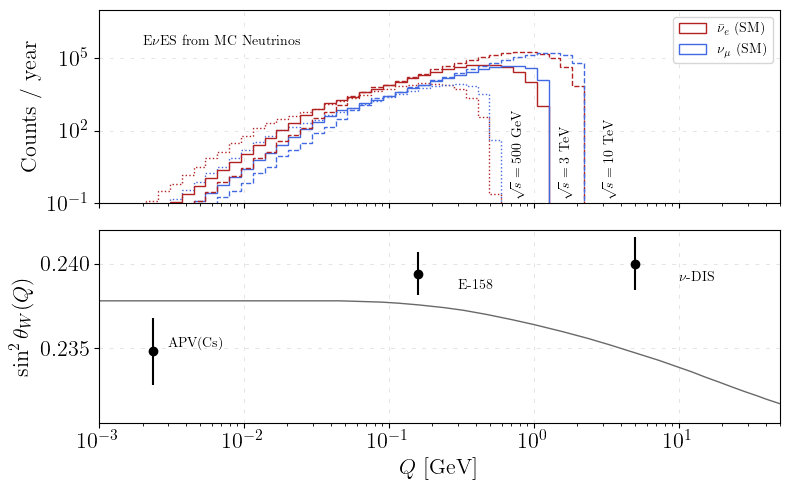

In [20]:
sw2_dat = np.genfromtxt("data/sw2_theory_curve_Q2.txt")
SSW_AT_1GEV = 0.23638198757763973


mucol_1sigma_sw2_vals = [SSW_AT_1GEV]
mucol_1sigma_Q2_vals = [1.0]
mucol_1sigma_Q2_err = [0.0004]

nuDIS = [5.0, 0.24, 0.00159]
E158 = [0.16, 0.2394, 0.00128]
APV = [2.35e-3, 0.2348, 0.002]

# Create the figure and set up the grid
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 5), sharex=True)

q_bins = np.logspace(-3, 1)

# Top panel: Recoil energy spectrum plot
ax1.hist(1e-3*sqrt(2*M_E*nuebar_energies_500), weights=nuebar_wgts_500, bins=q_bins, histtype='step',
         color='firebrick', ls='dotted')
ax1.hist(1e-3*sqrt(2*M_E*numu_energies_500), weights=numu_wgts_500, bins=q_bins, histtype='step',
         color='royalblue', ls='dotted')

ax1.hist(1e-3*sqrt(2*M_E*nuebar_energies_3TeV), weights=nuebar_wgts_3TeV, bins=q_bins, histtype='step',
         label=r"$\bar{\nu}_e$ (SM)", color='firebrick')
ax1.hist(1e-3*sqrt(2*M_E*numu_energies_3TeV), weights=numu_wgts_3TeV, bins=q_bins, histtype='step',
         label=r"$\nu_\mu$ (SM)", color='royalblue')

ax1.hist(1e-3*sqrt(2*M_E*nuebar_energies_10TeV), weights=nuebar_wgts_10TeV, bins=q_bins, histtype='step',
         color='firebrick', ls='dashed')
ax1.hist(1e-3*sqrt(2*M_E*numu_energies_10TeV), weights=numu_wgts_10TeV, bins=q_bins, histtype='step',
         color='royalblue', ls='dashed')

ax1.text(2e-3, 370000, r"E$\nu$ES from MC Neutrinos")

ax1.text(7e-1, 2e-1, r"$\sqrt{s}=500$ GeV", rotation=90.0)
ax1.text(1.5, 2e-1, r"$\sqrt{s}=3$ TeV", rotation=90.0)
ax1.text(3, 2e-1, r"$\sqrt{s}=10$ TeV", rotation=90.0)

ax1.legend(loc="upper right")


ax1.set_ylabel("Counts / year", fontsize=16)
ax1.set_xlim((q_bins[0], q_bins[-1]))
ax1.set_ylim((0.1, 1e7))
ax1.set_yscale('log')

# Bottom panel: sin^2(theta) plot
ax2.plot(sw2_dat[:,0], sw2_dat[:,1], color='dimgray', linewidth=1.0)
ax2.errorbar(nuDIS[0], nuDIS[1], yerr=nuDIS[2], color='k', marker='o', ls='none')
ax2.errorbar(E158[0], E158[1], yerr=E158[2], color='k', marker='o', ls='none')
ax2.errorbar(APV[0], APV[1], yerr=APV[2], color='k', marker='o', ls='none')

ax2.text(3e-3, 0.235, "APV(Cs)")
ax2.text(3e-1, 0.2385, "E-158")
ax2.text(10.0, 0.239, r"$\nu$-DIS")

ax2.set_xscale('log')
ax2.set_xlabel(r"$Q$ [GeV]", fontsize=16)
ax2.set_ylabel(r"$\sin^2 \theta_W (Q)$", fontsize=16)
ax2.set_ylim(top=0.242)
ax2.set_xlim((1e-3, 5e1))

ax1.tick_params(axis="x", labelsize=16)
ax1.tick_params(axis="y", labelsize=16)
ax2.tick_params(axis="x", labelsize=16)
ax2.tick_params(axis="y", labelsize=16)

# set the grid
ax1.grid(True, linestyle='-', linewidth=0.5, alpha=0.3, color='gray', dashes=(5,10))
ax2.grid(True, linestyle='-', linewidth=0.5, alpha=0.3, color='gray', dashes=(5,10))
for line in plt.gca().xaxis.get_gridlines():
    line.set_dash_capstyle('round')
for line in plt.gca().yaxis.get_gridlines():
    line.set_dash_capstyle('round')

# Final adjustments and save
plt.tight_layout()
plt.savefig("plots/weak_mixing/EvES_spectra_by_COM_energy_vs_Q_and_SSW.pdf")
plt.show()

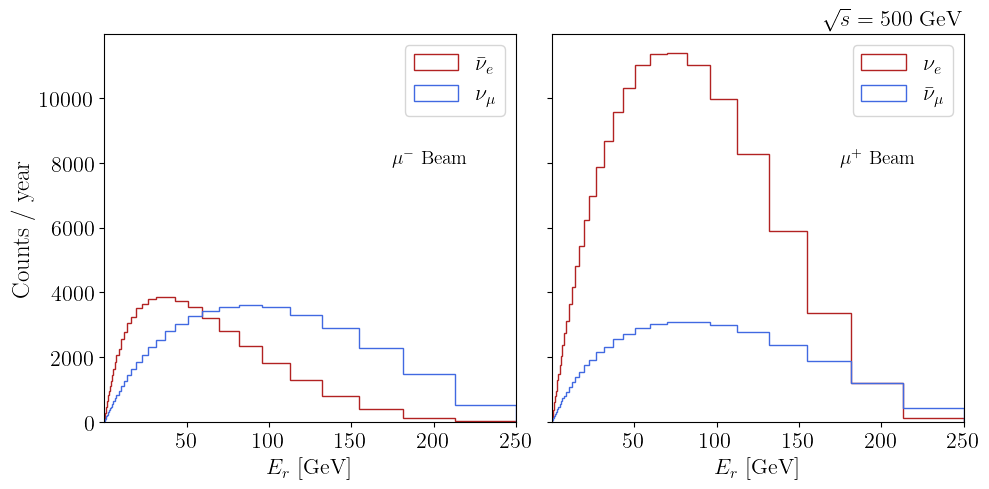

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

er_bins_500 = np.logspace(-1, np.log10(250), 50)  # GeV

ax1.hist(1e-3*nuebar_energies_500, weights=nuebar_wgts_500, bins=er_bins_500, histtype='step',
         label=r"$\bar{\nu}_e$", color='firebrick')
ax1.hist(1e-3*numu_energies_500, weights=numu_wgts_500, bins=er_bins_500, histtype='step',
         label=r"$\nu_\mu$", color='royalblue')

ax2.hist(1e-3*nue_energies_500, weights=nue_wgts_500, bins=er_bins_500, histtype='step',
         label=r"$\nu_e$", color='firebrick')
ax2.hist(1e-3*numubar_energies_500, weights=numubar_wgts_500, bins=er_bins_500, histtype='step',
         label=r"$\bar{\nu}_\mu$", color='royalblue')
ax1.legend(fontsize=16)
ax2.legend(fontsize=16)

ax1.tick_params(axis="x", labelsize=16)
ax1.tick_params(axis="y", labelsize=16)
ax2.tick_params(axis="x", labelsize=16)
ax2.tick_params(axis="y", labelsize=16)

ax1.set_xlabel(r"$E_r$ [GeV]", fontsize=16)
ax2.set_xlabel(r"$E_r$ [GeV]", fontsize=16)
ax1.set_xlim((er_bins_500[0], er_bins_500[-1]))
ax2.set_xlim((er_bins_500[0], er_bins_500[-1]))

ax1.set_ylabel("Counts / year", fontsize=18)

ax1.text(175.0, 8000.0, "$\mu^-$ Beam", fontsize=14)
ax2.text(175.0, 8000.0, "$\mu^+$ Beam", fontsize=14)

plt.title(r"$\sqrt{s} = 500$ GeV", loc="right", fontsize=16)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.tight_layout()
plt.savefig("plots/spectra/MC-500GeV_EvES_4flavor_recoil_energy.pdf")
plt.show()

### Test if we can see the electron mass term

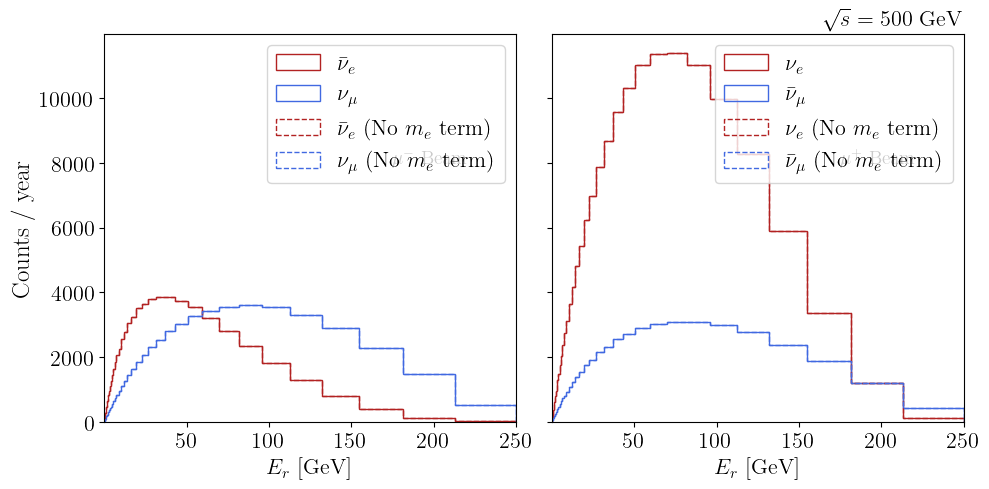

In [5]:
SSW_AT_1GEV = 0.23638198757763973
N_SAMPLES = 500

# sqrt(s) = 500 GeV
eves_gen_nuebar_500.simulate_eves_rectangle_rule(n_samples=N_SAMPLES, turn_off_cross_term=True)
eves_gen_numu_500.simulate_eves_rectangle_rule(n_samples=N_SAMPLES, turn_off_cross_term=True)
nuebar_energies_500_NX, _, _, nuebar_wgts_500_NX = eves_gen_nuebar_500.get_energy_theta_phi_wgt_arrays()
numu_energies_500_NX, _, _, numu_wgts_500_NX = eves_gen_numu_500.get_energy_theta_phi_wgt_arrays()

eves_gen_nue_500.simulate_eves_rectangle_rule(n_samples=N_SAMPLES, turn_off_cross_term=True)
eves_gen_numubar_500.simulate_eves_rectangle_rule(n_samples=N_SAMPLES, turn_off_cross_term=True)
nue_energies_500_NX, _, _, nue_wgts_500_NX = eves_gen_nue_500.get_energy_theta_phi_wgt_arrays()
numubar_energies_500_NX, _, _, numubar_wgts_500_NX = eves_gen_numubar_500.get_energy_theta_phi_wgt_arrays()


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

er_bins_500 = np.logspace(-1, np.log10(250), 50)  # GeV

# With full cross section
ax1.hist(1e-3*nuebar_energies_500, weights=nuebar_wgts_500, bins=er_bins_500, histtype='step',
         label=r"$\bar{\nu}_e$", color='firebrick')
ax1.hist(1e-3*numu_energies_500, weights=numu_wgts_500, bins=er_bins_500, histtype='step',
         label=r"$\nu_\mu$", color='royalblue')

ax2.hist(1e-3*nue_energies_500, weights=nue_wgts_500, bins=er_bins_500, histtype='step',
         label=r"$\nu_e$", color='firebrick')
ax2.hist(1e-3*numubar_energies_500, weights=numubar_wgts_500, bins=er_bins_500, histtype='step',
         label=r"$\bar{\nu}_\mu$", color='royalblue')

# without cross term propto electron mass
ax1.hist(1e-3*nuebar_energies_500_NX, weights=nuebar_wgts_500_NX, bins=er_bins_500, histtype='step',
         label=r"$\bar{\nu}_e$ (No $m_e$ term)", color='firebrick', ls='dashed')
ax1.hist(1e-3*numu_energies_500_NX, weights=numu_wgts_500_NX, bins=er_bins_500, histtype='step',
         label=r"$\nu_\mu$ (No $m_e$ term)", color='royalblue', ls='dashed')

ax2.hist(1e-3*nue_energies_500_NX, weights=nue_wgts_500_NX, bins=er_bins_500, histtype='step',
         label=r"$\nu_e$ (No $m_e$ term)", color='firebrick', ls='dashed')
ax2.hist(1e-3*numubar_energies_500_NX, weights=numubar_wgts_500_NX, bins=er_bins_500, histtype='step',
         label=r"$\bar{\nu}_\mu$ (No $m_e$ term)", color='royalblue', ls='dashed')


ax1.legend(fontsize=16)
ax2.legend(fontsize=16)

ax1.tick_params(axis="x", labelsize=16)
ax1.tick_params(axis="y", labelsize=16)
ax2.tick_params(axis="x", labelsize=16)
ax2.tick_params(axis="y", labelsize=16)

ax1.set_xlabel(r"$E_r$ [GeV]", fontsize=16)
ax2.set_xlabel(r"$E_r$ [GeV]", fontsize=16)
ax1.set_xlim((er_bins_500[0], er_bins_500[-1]))
ax2.set_xlim((er_bins_500[0], er_bins_500[-1]))

ax1.set_ylabel("Counts / year", fontsize=18)

ax1.text(175.0, 8000.0, "$\mu^-$ Beam", fontsize=14)
ax2.text(175.0, 8000.0, "$\mu^+$ Beam", fontsize=14)

plt.title(r"$\sqrt{s} = 500$ GeV", loc="right", fontsize=16)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.tight_layout()
plt.savefig("plots/spectra/MC-500GeV_EvES_4flavor_recoil_energy_noME.pdf")
plt.show()

331773.9937663059 331773.895423815


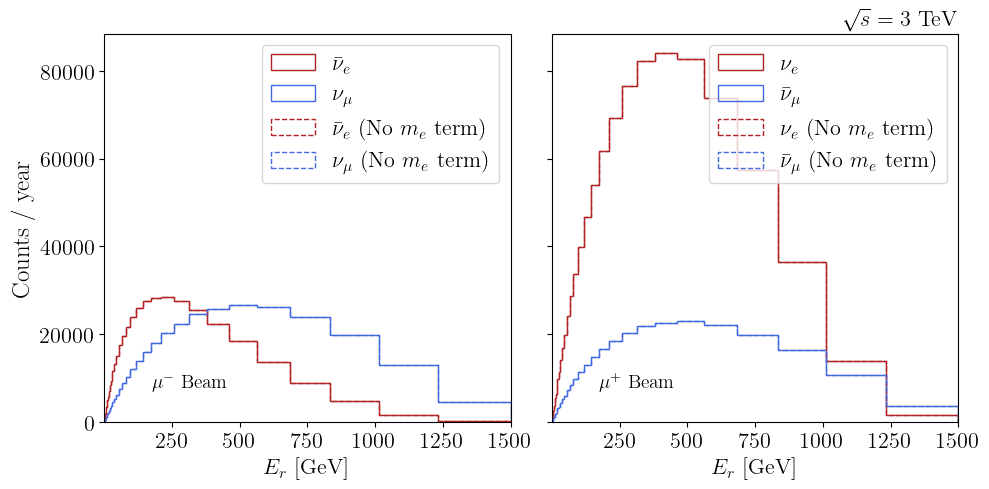

In [8]:
eves_gen_nuebar_3TeV.simulate_eves_rectangle_rule(n_samples=N_SAMPLES, turn_off_cross_term=True)
eves_gen_numu_3TeV.simulate_eves_rectangle_rule(n_samples=N_SAMPLES, turn_off_cross_term=True)
nuebar_energies_3TeV_NX, _, _, nuebar_wgts_3TeV_NX = eves_gen_nuebar_3TeV.get_energy_theta_phi_wgt_arrays()
numu_energies_3TeV_NX, _, _, numu_wgts_3TeV_NX = eves_gen_numu_3TeV.get_energy_theta_phi_wgt_arrays()

eves_gen_nue_3TeV.simulate_eves_rectangle_rule(n_samples=N_SAMPLES, turn_off_cross_term=True)
eves_gen_numubar_3TeV.simulate_eves_rectangle_rule(n_samples=N_SAMPLES, turn_off_cross_term=True)
nue_energies_3TeV_NX, _, _, nue_wgts_3TeV_NX = eves_gen_nue_3TeV.get_energy_theta_phi_wgt_arrays()
numubar_energies_3TeV_NX, _, _, numubar_wgts_3TeV_NX = eves_gen_numubar_3TeV.get_energy_theta_phi_wgt_arrays()

print(np.sum(numu_wgts_3TeV), np.sum(numu_wgts_3TeV_NX))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

er_bins_3TeV = np.logspace(-1, np.log10(1500.0), 50)  # GeV

# With full cross section
ax1.hist(1e-3*nuebar_energies_3TeV, weights=nuebar_wgts_3TeV, bins=er_bins_3TeV, histtype='step',
         label=r"$\bar{\nu}_e$", color='firebrick')
ax1.hist(1e-3*numu_energies_3TeV, weights=numu_wgts_3TeV, bins=er_bins_3TeV, histtype='step',
         label=r"$\nu_\mu$", color='royalblue')

ax2.hist(1e-3*nue_energies_3TeV, weights=nue_wgts_3TeV, bins=er_bins_3TeV, histtype='step',
         label=r"$\nu_e$", color='firebrick')
ax2.hist(1e-3*numubar_energies_3TeV, weights=numubar_wgts_3TeV, bins=er_bins_3TeV, histtype='step',
         label=r"$\bar{\nu}_\mu$", color='royalblue')

# without cross term propto electron mass
ax1.hist(1e-3*nuebar_energies_3TeV_NX, weights=nuebar_wgts_3TeV_NX, bins=er_bins_3TeV, histtype='step',
         label=r"$\bar{\nu}_e$ (No $m_e$ term)", color='firebrick', ls='dashed')
ax1.hist(1e-3*numu_energies_3TeV_NX, weights=numu_wgts_3TeV_NX, bins=er_bins_3TeV, histtype='step',
         label=r"$\nu_\mu$ (No $m_e$ term)", color='royalblue', ls='dashed')

ax2.hist(1e-3*nue_energies_3TeV_NX, weights=nue_wgts_3TeV_NX, bins=er_bins_3TeV, histtype='step',
         label=r"$\nu_e$ (No $m_e$ term)", color='firebrick', ls='dashed')
ax2.hist(1e-3*numubar_energies_3TeV_NX, weights=numubar_wgts_3TeV_NX, bins=er_bins_3TeV, histtype='step',
         label=r"$\bar{\nu}_\mu$ (No $m_e$ term)", color='royalblue', ls='dashed')


ax1.legend(fontsize=16)
ax2.legend(fontsize=16)

ax1.tick_params(axis="x", labelsize=16)
ax1.tick_params(axis="y", labelsize=16)
ax2.tick_params(axis="x", labelsize=16)
ax2.tick_params(axis="y", labelsize=16)

ax1.set_xlabel(r"$E_r$ [GeV]", fontsize=16)
ax2.set_xlabel(r"$E_r$ [GeV]", fontsize=16)
ax1.set_xlim((er_bins_3TeV[0], er_bins_3TeV[-1]))
ax2.set_xlim((er_bins_3TeV[0], er_bins_3TeV[-1]))

ax1.set_ylabel("Counts / year", fontsize=18)

ax1.text(175.0, 8000.0, "$\mu^-$ Beam", fontsize=14)
ax2.text(175.0, 8000.0, "$\mu^+$ Beam", fontsize=14)

plt.title(r"$\sqrt{s} = 3$ TeV", loc="right", fontsize=16)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.tight_layout()
plt.savefig("plots/spectra/MC-3TeV_EvES_4flavor_recoil_energy_noME.pdf")
plt.show()

# Collect Benchmarks for Muon Storage + MuCol

## Muon Storage Ring: only nu_mu, nu_ebar

* 500 GeV
* 3 TeV
* 10 TeV

## Muon Collider

* 500 GeV
* 3 TeV
* 10 TeV

## Naming Conventions
* SR = Storage Ring
* MC = muon collider
* WMA = weak mixing angle
* GVGA = g_V and g_A couplings

ex: WMA_deltaChi2_3TeV_SR_200m_25m2_by_10m = Weak mixing angle measurement from a 3 TeV muon storage ring with a 25 m^2 by 10m long detector 200 m away

## Plotting gV vs gA: MultiNest benchmarks

In [4]:
mndat_MC_500GeV_2param = np.genfromtxt("multinest/Quest/MC/sqrts-500GeV_MC_2param_.txt")
mndat_MC_3TeV_2param = np.genfromtxt("multinest/Quest/MC/sqrts-3TeV_MC_2param_.txt")
mndat_MC_10TeV_2param = np.genfromtxt("multinest/Quest/MC/sqrts-10TeV_MC_2param_.txt")

mndat_SR_500GeV_2param = np.genfromtxt("multinest/Quest/SR/sqrts-500GeV_SR_2param_.txt")
mndat_SR_3TeV_2param = np.genfromtxt("multinest/Quest/SR/sqrts-3TeV_SR_2param_.txt")
mndat_SR_10TeV_2param = np.genfromtxt("multinest/Quest/SR/sqrts-10TeV_SR_2param_.txt")

In [3]:
fluxes_dict = {
    "500GeV": {
        "SSW": 0.23739130434782607  # at 0.24 GeV
    },
    "3TeV": {
        "SSW": 0.23667701863354035  # at 0.7 GeV
    },
    "10TeV": {
        "SSW": 0.23596273291925465  # at 1.5 GeV
    }
}

from scipy.interpolate import griddata

from matplotlib.lines import Line2D


def plot_gV_gA_2param(mndat_list, slist, marker_list=["*", "+", "x"],
                        color_list=['royalblue', 'orange', 'mediumseagreen'],
                        plot_points=False, plot_title=r"$\mu^+ \mu^-$ Collider",
                        label_list=[r"$\sqrt{s} = 500$ GeV", r"$\sqrt{s} = 3$ TeV", r"$\sqrt{s} = 10$ TeV"],
                        save_name="plots/VA_couplings/gV_gA_MC_benchmark_sensitivity.pdf"):

    # Begin plotting: Two quadrants
    fig, axes = plt.subplots(1, 2, figsize=(13, 6))
    fig.subplots_adjust(hspace=0.05, wspace=0.3)

    handles, labels = plt.gca().get_legend_handles_labels()

    for i, mndat in enumerate(mndat_list):
        # Read in data
        g_L = mndat[:, 2]
        g_R = mndat[:, 3]
        deltaChi2 = mndat[:, 1]

        # Assign colors and alphas based on different contours
        colors = np.zeros_like(deltaChi2, dtype=object)
        colors[deltaChi2 < 2.3] = 'navy'
        colors[(deltaChi2 >= 2.3) & (deltaChi2 < 6.18)] = 'mediumseagreen'
        colors[deltaChi2 >= 6.18] = 'silver'

        alphas = np.zeros_like(deltaChi2, dtype=object)
        alphas[deltaChi2 < 2.3] = 0.5
        alphas[(deltaChi2 >= 2.3) & (deltaChi2 < 6.18)]  = 0.9
        alphas[deltaChi2 >= 6.18] = 0.0

        gV = (g_L + g_R)
        gA = (g_L - g_R)

        if plot_points:
            axes[0].scatter(gV, gA, c=colors, alpha=alphas, cmap='viridis', s=1)
        
        axes[0].set_xlim((-0.505, -0.495))
        axes[0].set_ylim((-0.03, -0.02))
        axes[0].set_ylabel(r"$g_A$", fontsize=16)
        axes[0].set_xlabel(r"$g_V$", fontsize=16)

        # Try with grid interp
        grid_x, grid_y = np.mgrid[min(gV):max(gV):5000j, min(gA):max(gA):5000j]
        grid_deltaChi2 = griddata((gV, gA), deltaChi2, (grid_x, grid_y), method='cubic')
        axes[0].contour(grid_x, grid_y, grid_deltaChi2, levels=[4.61], colors=color_list[i])

        if plot_points:    
            axes[1].scatter(gV, gA, c=colors, alpha=alphas, cmap='viridis', s=1)
        
        axes[1].set_xlim((-0.03, -0.02))
        axes[1].set_ylim((-0.505, -0.495))
        axes[1].set_xlabel(r"$g_V$", fontsize=16)
        axes[1].set_ylabel(r"$g_A$", fontsize=16)
        
        grid_x, grid_y = np.mgrid[min(gV):max(gV):5000j, min(gA):max(gA):5000j]
        grid_deltaChi2 = griddata((gV, gA), deltaChi2, (grid_x, grid_y), method='cubic')
        axes[1].contour(grid_x, grid_y, grid_deltaChi2, levels=[4.61], colors=color_list[i])

        # SM point
        axes[1].plot(-0.5 + 2*fluxes_dict[slist[i]]["SSW"], -0.5,
                        color=color_list[i], marker=marker_list[i])

        line = Line2D([0], [0], label=label_list[i], color=color_list[i])
        handles.extend([line])

    axes[0].tick_params(axis="x", labelsize=16)
    axes[0].tick_params(axis="y", labelsize=16)
    axes[1].tick_params(axis="x", labelsize=16)
    axes[1].tick_params(axis="y", labelsize=16)

    # Set the grids
    axes[0].grid(True, linestyle='-', linewidth=0.5, alpha=0.6, color='gray', dashes=(5,10))
    axes[1].grid(True, linestyle='-', linewidth=0.5, alpha=0.6, color='gray', dashes=(5,10))

    for line in plt.gca().xaxis.get_gridlines():
        line.set_dash_capstyle('round')

    for line in plt.gca().yaxis.get_gridlines():
        line.set_dash_capstyle('round')

    axes[1].set_title(plot_title, loc="right", fontsize=14)
    axes[1].legend(handles=handles, loc="upper right", framealpha=1, fontsize=14)

    
    plt.show()
    plt.tight_layout()
    fig.savefig(save_name)
    plt.close()


fluxes_dict = {
    "500GeV": {
        "SSW": 0.23739130434782607  # at 0.24 GeV
    },
    "3TeV": {
        "SSW": 0.23667701863354035  # at 0.7 GeV
    },
    "10TeV": {
        "SSW": 0.23596273291925465  # at 1.5 GeV
    }
}

from scipy.interpolate import griddata

from matplotlib.lines import Line2D


def plot_gV_gA_2param_full(mndat_list, slist, marker_list=["*", "+", "x"],
                        color_list=['royalblue', 'orange', 'mediumseagreen'],
                        plot_points=False, plot_title=r"$\mu^+ \mu^-$ Collider",
                        label_list=[r"$\sqrt{s} = 500$ GeV", r"$\sqrt{s} = 3$ TeV", r"$\sqrt{s} = 10$ TeV"],
                        save_name="plots/VA_couplings/gV_gA_MC_benchmark_sensitivity.pdf"):

    # Begin plotting: Two quadrants
    for i, mndat in enumerate(mndat_list):
        # Read in data
        g_L = mndat[:, 2]
        g_R = mndat[:, 3]
        deltaChi2 = mndat[:, 1]

        # Assign colors and alphas based on different contours
        colors = np.zeros_like(deltaChi2, dtype=object)
        colors[deltaChi2 < 2.3] = 'navy'
        colors[(deltaChi2 >= 2.3) & (deltaChi2 < 6.18)] = 'mediumseagreen'
        colors[deltaChi2 >= 6.18] = 'silver'

        alphas = np.zeros_like(deltaChi2, dtype=object)
        alphas[deltaChi2 < 2.3] = 0.5
        alphas[(deltaChi2 >= 2.3) & (deltaChi2 < 6.18)]  = 0.9
        alphas[deltaChi2 >= 6.18] = 0.0

        gV = (g_L + g_R)
        gA = (g_L - g_R)

        plt.scatter(gV, gA, c=colors, alpha=alphas, cmap='viridis', s=1)


    #axes[0].set_xlim((-0.505, -0.495))
    #axes[0].set_ylim((-0.03, -0.02))
    plt.ylabel(r"$g_A$", fontsize=16)
    plt.xlabel(r"$g_V$", fontsize=16)

    # Set the grids
    plt.grid(True, linestyle='-', linewidth=0.5, alpha=0.6, color='gray', dashes=(5,10))

    for line in plt.gca().xaxis.get_gridlines():
        line.set_dash_capstyle('round')

    for line in plt.gca().yaxis.get_gridlines():
        line.set_dash_capstyle('round')

    plt.title(plot_title, loc="right", fontsize=14)
    #plt.legend(handles=handles, loc="upper right", framealpha=1, fontsize=14)
    
    plt.show()
    plt.tight_layout()
    plt.close()

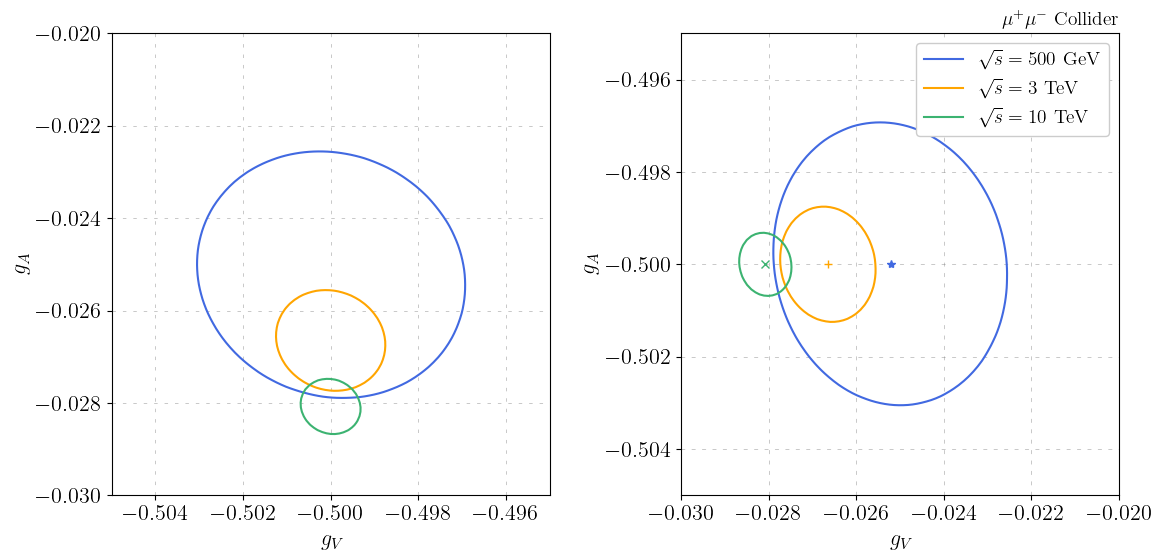

In [81]:
plot_gV_gA_2param(mndat_list=[mndat_MC_500GeV_2param,
                                mndat_MC_3TeV_2param,
                                mndat_MC_10TeV_2param],
                  slist=["500GeV", "3TeV", "10TeV"], plot_title=r"$\mu^+ \mu^-$ Collider",
                  label_list=[r"$\sqrt{s} = 500$ GeV", r"$\sqrt{s} = 3$ TeV", r"$\sqrt{s} = 10$ TeV"])

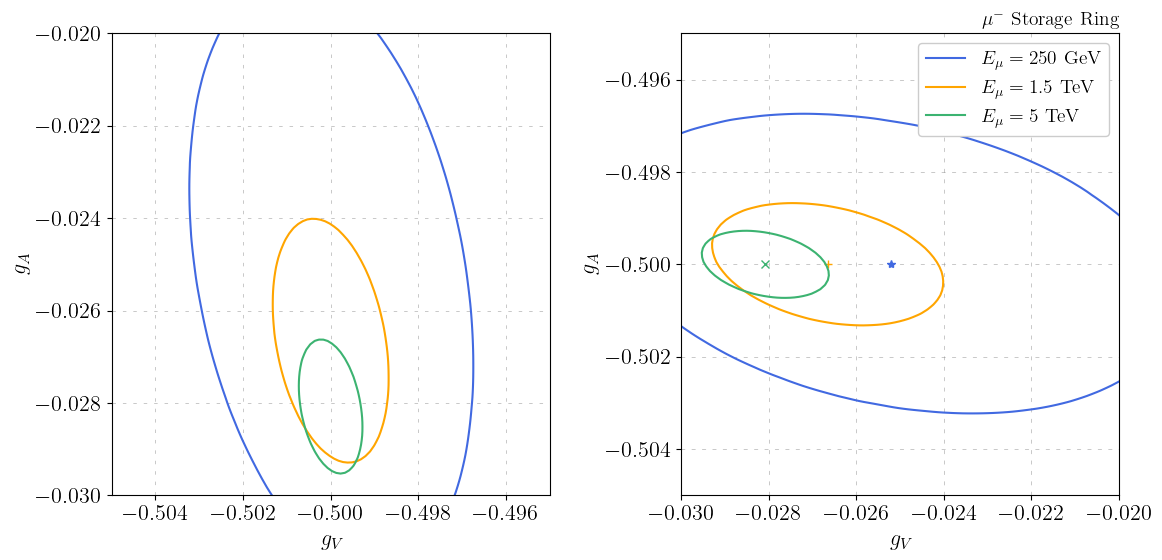

In [85]:
plot_gV_gA_2param(mndat_list=[mndat_SR_500GeV_2param,
                                mndat_SR_3TeV_2param,
                                mndat_SR_10TeV_2param],
                  slist=["500GeV", "3TeV", "10TeV"], plot_title=r"$\mu^-$ Storage Ring",
                  label_list=[r"$E_\mu = 250$ GeV", r"$E_\mu = 1.5$ TeV", r"$E_\mu = 5$ TeV"],
                  save_name="plots/VA_couplings/gV_gA_SR_benchmark_sensitivity.pdf")

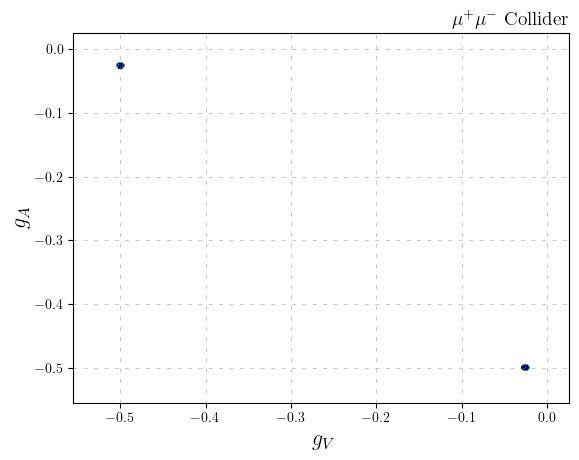

In [90]:
plot_gV_gA_2param_full(mndat_list=[mndat_MC_500GeV_2param,
                                mndat_MC_3TeV_2param,
                                mndat_MC_10TeV_2param],
                  slist=["500GeV", "3TeV", "10TeV"], plot_title=r"$\mu^+ \mu^-$ Collider",
                  label_list=[r"$\sqrt{s} = 500$ GeV", r"$\sqrt{s} = 3$ TeV", r"$\sqrt{s} = 10$ TeV"])

# Plotting Sensitivity to the Neutrino Couplings $g_\nu$

In [2]:
mndat_MC_500GeV_gnu = np.genfromtxt("multinest/Quest/MC_NUFLAV/sqrts-500GeV_MC_nuflavor_.txt")
mndat_MC_3TeV_gnu = np.genfromtxt("multinest/Quest/MC_NUFLAV/sqrts-3TeV_MC_nuflavor_.txt")
mndat_MC_10TeV_gnu = np.genfromtxt("multinest/Quest/MC_NUFLAV/sqrts-10TeV_MC_nuflavor_.txt")

mndat_SR_500GeV_gnu = np.genfromtxt("multinest/Quest/SR_NUFLAV/sqrts-500GeV_SR_nuflavor_.txt")
mndat_SR_3TeV_gnu = np.genfromtxt("multinest/Quest/SR_NUFLAV/sqrts-3TeV_SR_nuflavor_.txt")
mndat_SR_10TeV_gnu = np.genfromtxt("multinest/Quest/SR_NUFLAV/sqrts-10TeV_SR_nuflavor_.txt")

In [24]:
fluxes_dict = {
    "500GeV": {
        "SSW": 0.23739130434782607  # at 0.24 GeV
    },
    "3TeV": {
        "SSW": 0.23667701863354035  # at 0.7 GeV
    },
    "10TeV": {
        "SSW": 0.23596273291925465  # at 1.5 GeV
    }
}

from scipy.interpolate import griddata

from matplotlib.lines import Line2D

def plot_gnu_2param_full(mndat_list, slist, marker_list=["*", "+", "x"],
                        color_list=['royalblue', 'orange', 'mediumseagreen'],
                        plot_points=False, plot_title=r"$\mu^+ \mu^-$ Collider",
                        label_list=[r"$\sqrt{s} = 500$ GeV", r"$\sqrt{s} = 3$ TeV", r"$\sqrt{s} = 10$ TeV"],
                        save_name="plots/VA_couplings/gV_gA_MC_benchmark_sensitivity.pdf"):

    # Begin plotting: Two quadrants
    for i, mndat in enumerate(mndat_list):
        # Read in data
        gnu_e = mndat[:, 2]
        gnu_mu = mndat[:, 3]
        deltaChi2 = mndat[:, 1]

        # Assign colors and alphas based on different contours
        colors = np.zeros_like(deltaChi2, dtype=object)
        colors[deltaChi2 < 2.3] = 'navy'
        colors[(deltaChi2 >= 2.3) & (deltaChi2 < 6.18)] = 'mediumseagreen'
        colors[deltaChi2 >= 6.18] = 'silver'

        alphas = np.zeros_like(deltaChi2, dtype=object)
        alphas[deltaChi2 < 2.3] = 0.5
        alphas[(deltaChi2 >= 2.3) & (deltaChi2 < 6.18)]  = 0.9
        alphas[deltaChi2 >= 6.18] = 0.0

        plt.scatter(gnu_e, gnu_mu, c=colors, alpha=alphas, cmap='viridis', s=1)


    #axes[0].set_xlim((-0.505, -0.495))
    #axes[0].set_ylim((-0.03, -0.02))
    #plt.ylabel(r"$g_{\nu_\mu}$", fontsize=16)
    #plt.xlabel(r"$g__{\nu_e}$", fontsize=16)

    # Set the grids
    plt.grid(True, linestyle='-', linewidth=0.5, alpha=0.6, color='gray', dashes=(5,10))

    for line in plt.gca().xaxis.get_gridlines():
        line.set_dash_capstyle('round')

    for line in plt.gca().yaxis.get_gridlines():
        line.set_dash_capstyle('round')

    plt.title(plot_title, loc="right", fontsize=14)
    #plt.legend(handles=handles, loc="upper right", framealpha=1, fontsize=14)
    
    plt.show()
    plt.tight_layout()
    plt.close()


def plot_gnu_2param(mc_dat_list, sr_dat_list, slist, marker_list=["*", "+", "x"],
                        color_list=['royalblue', 'orange', 'mediumseagreen'],
                        plot_points=False, plot_title=r"$\mu^+ \mu^-$ Collider",
                        label_list=[r"$\sqrt{s} = 500$ GeV", r"$\sqrt{s} = 3$ TeV", r"$\sqrt{s} = 10$ TeV"],
                        save_name="plots/VA_couplings/gV_gA_MC_benchmark_sensitivity.pdf"):

    # Begin plotting: Two quadrants
    fig, axes = plt.subplots(1, 2, figsize=(13, 6))
    fig.subplots_adjust(hspace=0.05, wspace=0.3)

    handles, labels = plt.gca().get_legend_handles_labels()

    for i, mndat in enumerate(sr_dat_list):
        # Read in data
        gnu_e = mndat[:, 2]
        gnu_mu = mndat[:, 3]
        deltaChi2 = mndat[:, 1]

        # Assign colors and alphas based on different contours
        colors = np.zeros_like(deltaChi2, dtype=object)
        colors[deltaChi2 < 2.3] = 'navy'
        colors[(deltaChi2 >= 2.3) & (deltaChi2 < 6.18)] = 'mediumseagreen'
        colors[deltaChi2 >= 6.18] = 'silver'

        alphas = np.zeros_like(deltaChi2, dtype=object)
        alphas[deltaChi2 < 2.3] = 0.5
        alphas[(deltaChi2 >= 2.3) & (deltaChi2 < 6.18)]  = 0.9
        alphas[deltaChi2 >= 6.18] = 0.0

        if plot_points:
            axes[0].scatter(gnu_e, gnu_mu, c=colors, alpha=alphas, cmap='viridis', s=1)
        
        axes[0].set_xlim((0.475, 0.525))
        axes[0].set_ylim((0.475, 0.525))
        axes[0].set_ylabel(r"$g_{\nu_\mu}$", fontsize=16)
        axes[0].set_xlabel(r"$g_{\nu_e}$", fontsize=16)

        # Try with grid interp
        grid_x, grid_y = np.mgrid[min(gnu_e):max(gnu_e):5000j, min(gnu_mu):max(gnu_mu):5000j]
        grid_deltaChi2 = griddata((gnu_e, gnu_mu), deltaChi2, (grid_x, grid_y), method='cubic')
        axes[0].contour(grid_x, grid_y, grid_deltaChi2, levels=[4.61], colors=color_list[i])

        if plot_points:    
            axes[0].scatter(gnu_e, gnu_mu, c=colors, alpha=alphas, cmap='viridis', s=1)
        
        axes[0].set_title(r"$\mu^-$ Storage Ring", loc="right", fontsize=14)

        #line = Line2D([0], [0], label=label_list[i], color=color_list[i])
        #handles.extend([line])
    
    for i, mndat in enumerate(mc_dat_list):
        # Read in data
        gnu_e = mndat[:, 2]
        gnu_mu = mndat[:, 3]
        deltaChi2 = mndat[:, 1]

        # Assign colors and alphas based on different contours
        colors = np.zeros_like(deltaChi2, dtype=object)
        colors[deltaChi2 < 2.3] = 'navy'
        colors[(deltaChi2 >= 2.3) & (deltaChi2 < 6.18)] = 'mediumseagreen'
        colors[deltaChi2 >= 6.18] = 'silver'

        alphas = np.zeros_like(deltaChi2, dtype=object)
        alphas[deltaChi2 < 2.3] = 0.5
        alphas[(deltaChi2 >= 2.3) & (deltaChi2 < 6.18)]  = 0.9
        alphas[deltaChi2 >= 6.18] = 0.0

        if plot_points:
            axes[0].scatter(gnu_e, gnu_mu, c=colors, alpha=alphas, cmap='viridis', s=1)
        
        axes[1].set_xlim((0.475, 0.525))
        axes[1].set_ylim((0.475, 0.525))
        axes[1].set_ylabel(r"$g_{\nu_\mu}$", fontsize=16)
        axes[1].set_xlabel(r"$g_{\nu_e}$", fontsize=16)

        # Try with grid interp
        grid_x, grid_y = np.mgrid[min(gnu_e):max(gnu_e):5000j, min(gnu_mu):max(gnu_mu):5000j]
        grid_deltaChi2 = griddata((gnu_e, gnu_mu), deltaChi2, (grid_x, grid_y), method='cubic')
        axes[1].contour(grid_x, grid_y, grid_deltaChi2, levels=[4.61], colors=color_list[i])

        if plot_points:    
            axes[1].scatter(gnu_e, gnu_mu, c=colors, alpha=alphas, cmap='viridis', s=1)

        line = Line2D([0], [0], label=label_list[i], color=color_list[i])
        handles.extend([line])

    axes[0].tick_params(axis="x", labelsize=16)
    axes[0].tick_params(axis="y", labelsize=16)
    axes[1].tick_params(axis="x", labelsize=16)
    axes[1].tick_params(axis="y", labelsize=16)

    # Set the grids
    axes[0].grid(True, linestyle='-', linewidth=0.5, alpha=0.6, color='gray', dashes=(5,10))
    axes[1].grid(True, linestyle='-', linewidth=0.5, alpha=0.6, color='gray', dashes=(5,10))

    for line in plt.gca().xaxis.get_gridlines():
        line.set_dash_capstyle('round')

    for line in plt.gca().yaxis.get_gridlines():
        line.set_dash_capstyle('round')

    axes[1].set_title(r"$\mu^+ \mu^-$ Collider", loc="right", fontsize=14)
    axes[1].legend(handles=handles, loc="upper right", framealpha=1, fontsize=14)

    
    plt.show()
    plt.tight_layout()
    fig.savefig(save_name)
    plt.close()

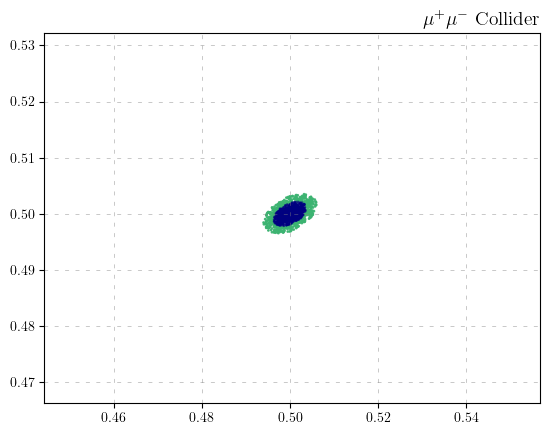

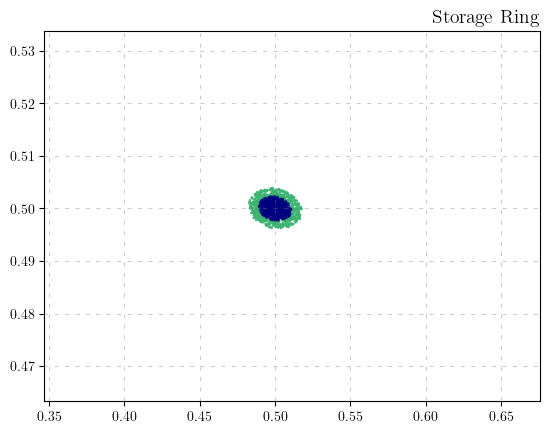

In [14]:
plot_gnu_2param_full(mndat_list=[mndat_MC_500GeV_gnu],
                  slist=["500GeV", "3TeV", "10TeV"], plot_title=r"$\mu^+ \mu^-$ Collider",
                  label_list=[r"$\sqrt{s} = 500$ GeV", r"$\sqrt{s} = 3$ TeV", r"$\sqrt{s} = 10$ TeV"])

plot_gnu_2param_full(mndat_list=[mndat_SR_500GeV_gnu],
                  slist=["500GeV", "3TeV", "10TeV"], plot_title=r"Storage Ring",
                  label_list=[r"$\sqrt{s} = 500$ GeV", r"$\sqrt{s} = 3$ TeV", r"$\sqrt{s} = 10$ TeV"])

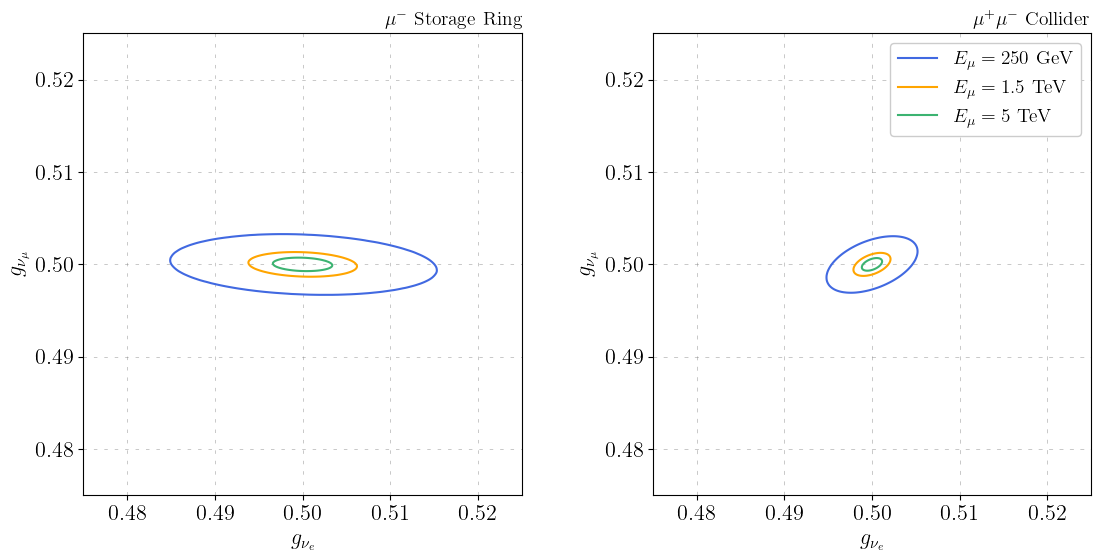

In [25]:
plot_gnu_2param(mc_dat_list=[mndat_MC_500GeV_gnu, mndat_MC_3TeV_gnu, mndat_MC_10TeV_gnu],
                sr_dat_list=[mndat_SR_500GeV_gnu, mndat_SR_3TeV_gnu, mndat_SR_10TeV_gnu],
                  slist=["500GeV", "3TeV", "10TeV"], plot_title=r"",
                  label_list=[r"$E_\mu = 250$ GeV", r"$E_\mu = 1.5$ TeV", r"$E_\mu = 5$ TeV"],
                  save_name="plots/VA_couplings/gnu_MC_SR_benchmark_sensitivity.pdf")

## Plotting 4 couplings: Multinest benchmarks

# Testing Sensitivity to the Running


### Set ```ssw_running=True``` in the below initializations

### 3 TeV

In [4]:
N_SAMPLES = 500

fluxes_dict = {
    "500GeV": {
        "SSW": 0.23739130434782607  # at 0.24 GeV
    },
    "3TeV": {
        "SSW": 0.23667701863354035  # at 0.7 GeV
    },
    "10TeV": {
        "SSW": 0.23596273291925465  # at 1.5 GeV
    }
}

# sqrt(s) = 3 TeV - WITH RUNNING
eves_gen_nuebar_3TeV_running = EvESFromNeutrinoFlux(nu_flux=nue_flux_3TeV, flavor="ebar", detector_material=Material("Ar"),
                                    detector_length=10.0, ssw_running=True)
eves_gen_numu_3TeV_running = EvESFromNeutrinoFlux(nu_flux=numu_flux_3TeV, flavor="mu", detector_material=Material("Ar"),
                                    detector_length=10.0, ssw_running=True)
eves_gen_nuebar_3TeV_running.simulate_eves_rectangle_rule(n_samples=N_SAMPLES)
eves_gen_numu_3TeV_running.simulate_eves_rectangle_rule(n_samples=N_SAMPLES)
nuebar_energies_3TeV_running, _, _, nuebar_wgts_3TeV_running = eves_gen_nuebar_3TeV_running.get_energy_theta_phi_wgt_arrays()
numu_energies_3TeV_running, _, _, numu_wgts_3TeV_running = eves_gen_numu_3TeV_running.get_energy_theta_phi_wgt_arrays()

eves_gen_nue_3TeV_running = EvESFromNeutrinoFlux(nu_flux=nue_flux_3TeV, flavor="e", detector_material=Material("Ar"),
                                    detector_length=10.0, ssw_running=True)
eves_gen_numubar_3TeV_running = EvESFromNeutrinoFlux(nu_flux=numu_flux_3TeV, flavor="mubar", detector_material=Material("Ar"),
                                    detector_length=10.0, ssw_running=True)
eves_gen_nue_3TeV_running.simulate_eves_rectangle_rule(n_samples=N_SAMPLES)
eves_gen_numubar_3TeV_running.simulate_eves_rectangle_rule(n_samples=N_SAMPLES)
nue_energies_3TeV_running, _, _, nue_wgts_3TeV_running = eves_gen_nue_3TeV_running.get_energy_theta_phi_wgt_arrays()
numubar_energies_3TeV_running, _, _, numubar_wgts_3TeV_running = eves_gen_numubar_3TeV_running.get_energy_theta_phi_wgt_arrays()


# sqrt(s) = 3 TeV WITHOUT RUNNING
eves_gen_nuebar_3TeV = EvESFromNeutrinoFlux(nu_flux=nue_flux_3TeV, flavor="ebar", detector_material=Material("Ar"),
                                    detector_length=10.0, weak_mixing_angle_squared=fluxes_dict['3TeV']['SSW'], ssw_running=False)
eves_gen_numu_3TeV = EvESFromNeutrinoFlux(nu_flux=numu_flux_3TeV, flavor="mu", detector_material=Material("Ar"),
                                    detector_length=10.0, weak_mixing_angle_squared=fluxes_dict['3TeV']['SSW'], ssw_running=False)
eves_gen_nuebar_3TeV.simulate_eves_rectangle_rule(n_samples=N_SAMPLES)
eves_gen_numu_3TeV.simulate_eves_rectangle_rule(n_samples=N_SAMPLES)
nuebar_energies_3TeV, _, _, nuebar_wgts_3TeV = eves_gen_nuebar_3TeV.get_energy_theta_phi_wgt_arrays()
numu_energies_3TeV, _, _, numu_wgts_3TeV = eves_gen_numu_3TeV.get_energy_theta_phi_wgt_arrays()

eves_gen_nue_3TeV = EvESFromNeutrinoFlux(nu_flux=nue_flux_3TeV, flavor="e", detector_material=Material("Ar"),
                                    detector_length=10.0, weak_mixing_angle_squared=fluxes_dict['3TeV']['SSW'], ssw_running=False)
eves_gen_numubar_3TeV = EvESFromNeutrinoFlux(nu_flux=numu_flux_3TeV, flavor="mubar", detector_material=Material("Ar"),
                                    detector_length=10.0, weak_mixing_angle_squared=fluxes_dict['3TeV']['SSW'], ssw_running=False)
eves_gen_nue_3TeV.simulate_eves_rectangle_rule(n_samples=N_SAMPLES)
eves_gen_numubar_3TeV.simulate_eves_rectangle_rule(n_samples=N_SAMPLES)
nue_energies_3TeV, _, _, nue_wgts_3TeV = eves_gen_nue_3TeV.get_energy_theta_phi_wgt_arrays()
numubar_energies_3TeV, _, _, numubar_wgts_3TeV = eves_gen_numubar_3TeV.get_energy_theta_phi_wgt_arrays()


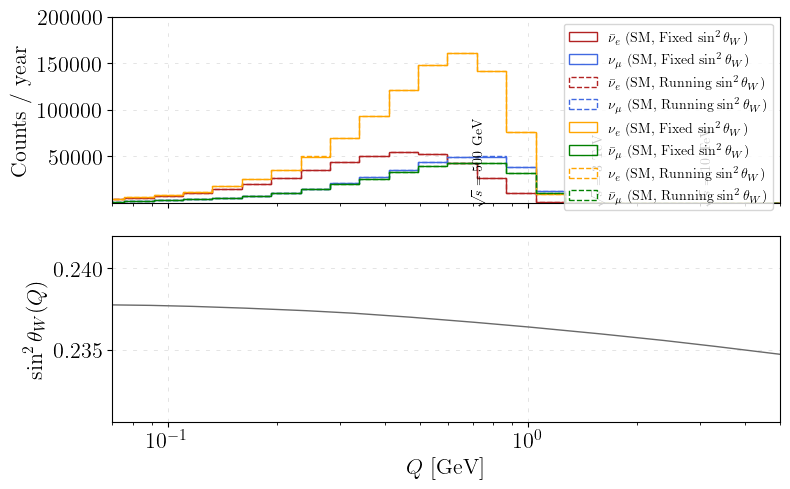

In [5]:
sw2_dat = np.genfromtxt("data/sw2_theory_curve_Q2.txt")
SSW_AT_1GEV = 0.23638198757763973


mucol_1sigma_sw2_vals = [SSW_AT_1GEV]
mucol_1sigma_Q2_vals = [1.0]
mucol_1sigma_Q2_err = [0.0004]

nuDIS = [5.0, 0.24, 0.00159]
E158 = [0.16, 0.2394, 0.00128]
APV = [2.35e-3, 0.2348, 0.002]

# Create the figure and set up the grid
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 5), sharex=True)

q_bins = np.logspace(-3, 1, 50)

# Top panel: Recoil energy spectrum plot

ax1.hist(1e-3*sqrt(2*M_E*nuebar_energies_3TeV), weights=nuebar_wgts_3TeV, bins=q_bins, histtype='step',
         label=r"$\bar{\nu}_e$ (SM, Fixed $\sin^2 \theta_W$)", color='firebrick')
ax1.hist(1e-3*sqrt(2*M_E*numu_energies_3TeV), weights=numu_wgts_3TeV, bins=q_bins, histtype='step',
         label=r"$\nu_\mu$ (SM, Fixed $\sin^2 \theta_W$)", color='royalblue')

ax1.hist(1e-3*sqrt(2*M_E*nuebar_energies_3TeV_running), weights=nuebar_wgts_3TeV_running, bins=q_bins, histtype='step',
         label=r"$\bar{\nu}_e$ (SM, Running $\sin^2 \theta_W$)", color='firebrick', ls='dashed')
ax1.hist(1e-3*sqrt(2*M_E*numu_energies_3TeV_running), weights=numu_wgts_3TeV_running, bins=q_bins, histtype='step',
         label=r"$\nu_\mu$ (SM, Running $\sin^2 \theta_W$)", color='royalblue', ls='dashed')

ax1.hist(1e-3*sqrt(2*M_E*nue_energies_3TeV), weights=nue_wgts_3TeV, bins=q_bins, histtype='step',
         label=r"$\nu_e$ (SM, Fixed $\sin^2 \theta_W$)", color='orange')
ax1.hist(1e-3*sqrt(2*M_E*numubar_energies_3TeV), weights=numubar_wgts_3TeV, bins=q_bins, histtype='step',
         label=r"$\bar{\nu}_\mu$ (SM, Fixed $\sin^2 \theta_W$)", color='g')

ax1.hist(1e-3*sqrt(2*M_E*nue_energies_3TeV_running), weights=nue_wgts_3TeV_running, bins=q_bins, histtype='step',
         label=r"$\nu_e$ (SM, Running $\sin^2 \theta_W$)", color='orange', ls='dashed')
ax1.hist(1e-3*sqrt(2*M_E*numubar_energies_3TeV_running), weights=numubar_wgts_3TeV_running, bins=q_bins, histtype='step',
         label=r"$\bar{\nu}_\mu$ (SM, Running $\sin^2 \theta_W$)", color='g', ls='dashed')


#ax1.text(2e-3, 370000, r"E$\nu$ES from MC Neutrinos")

ax1.text(7e-1, 2e-1, r"$\sqrt{s}=500$ GeV", rotation=90.0)
ax1.text(1.5, 2e-1, r"$\sqrt{s}=3$ TeV", rotation=90.0)
ax1.text(3, 2e-1, r"$\sqrt{s}=10$ TeV", rotation=90.0)

ax1.legend(loc="upper right")


ax1.set_ylabel("Counts / year", fontsize=16)
ax1.set_xlim((q_bins[0], q_bins[-1]))
ax1.set_ylim((0.1, 2e5))
#ax1.set_yscale('log')

# Bottom panel: sin^2(theta) plot
ax2.plot(sw2_dat[:,0], sw2_dat[:,1], color='dimgray', linewidth=1.0)



ax2.set_xscale('log')
ax2.set_xlabel(r"$Q$ [GeV]", fontsize=16)
ax2.set_ylabel(r"$\sin^2 \theta_W (Q)$", fontsize=16)
ax2.set_ylim(top=0.242)
ax2.set_xlim((7e-2, 5e0))

ax1.tick_params(axis="x", labelsize=16)
ax1.tick_params(axis="y", labelsize=16)
ax2.tick_params(axis="x", labelsize=16)
ax2.tick_params(axis="y", labelsize=16)

# set the grid
ax1.grid(True, linestyle='-', linewidth=0.5, alpha=0.3, color='gray', dashes=(5,10))
ax2.grid(True, linestyle='-', linewidth=0.5, alpha=0.3, color='gray', dashes=(5,10))
for line in plt.gca().xaxis.get_gridlines():
    line.set_dash_capstyle('round')
for line in plt.gca().yaxis.get_gridlines():
    line.set_dash_capstyle('round')

# Final adjustments and save
plt.tight_layout()
plt.savefig("plots/weak_mixing/EvES_spectra_by_COM_energy_vs_SSW_Running.pdf")
plt.show()

### 10 TeV

In [6]:
N_SAMPLES = 500

fluxes_dict = {
    "500GeV": {
        "SSW": 0.23739130434782607  # at 0.24 GeV
    },
    "10TeV": {
        "SSW": 0.23667701863354035  # at 0.7 GeV
    },
    "10TeV": {
        "SSW": 0.23596273291925465  # at 1.5 GeV
    }
}

# sqrt(s) = 10 TeV - WITH RUNNING
eves_gen_nuebar_10TeV_running = EvESFromNeutrinoFlux(nu_flux=nue_flux_10TeV, flavor="ebar", detector_material=Material("Ar"),
                                    detector_length=10.0, ssw_running=True)
eves_gen_numu_10TeV_running = EvESFromNeutrinoFlux(nu_flux=numu_flux_10TeV, flavor="mu", detector_material=Material("Ar"),
                                    detector_length=10.0, ssw_running=True)
eves_gen_nuebar_10TeV_running.simulate_eves_rectangle_rule(n_samples=N_SAMPLES)
eves_gen_numu_10TeV_running.simulate_eves_rectangle_rule(n_samples=N_SAMPLES)
nuebar_energies_10TeV_running, _, _, nuebar_wgts_10TeV_running = eves_gen_nuebar_10TeV_running.get_energy_theta_phi_wgt_arrays()
numu_energies_10TeV_running, _, _, numu_wgts_10TeV_running = eves_gen_numu_10TeV_running.get_energy_theta_phi_wgt_arrays()

eves_gen_nue_10TeV_running = EvESFromNeutrinoFlux(nu_flux=nue_flux_10TeV, flavor="e", detector_material=Material("Ar"),
                                    detector_length=10.0, ssw_running=True)
eves_gen_numubar_10TeV_running = EvESFromNeutrinoFlux(nu_flux=numu_flux_10TeV, flavor="mubar", detector_material=Material("Ar"),
                                    detector_length=10.0, ssw_running=True)
eves_gen_nue_10TeV_running.simulate_eves_rectangle_rule(n_samples=N_SAMPLES)
eves_gen_numubar_10TeV_running.simulate_eves_rectangle_rule(n_samples=N_SAMPLES)
nue_energies_10TeV_running, _, _, nue_wgts_10TeV_running = eves_gen_nue_10TeV_running.get_energy_theta_phi_wgt_arrays()
numubar_energies_10TeV_running, _, _, numubar_wgts_10TeV_running = eves_gen_numubar_10TeV_running.get_energy_theta_phi_wgt_arrays()


# sqrt(s) = 10 TeV WITHOUT RUNNING
eves_gen_nuebar_10TeV = EvESFromNeutrinoFlux(nu_flux=nue_flux_10TeV, flavor="ebar", detector_material=Material("Ar"),
                                    detector_length=10.0, weak_mixing_angle_squared=fluxes_dict['10TeV']['SSW'], ssw_running=False)
eves_gen_numu_10TeV = EvESFromNeutrinoFlux(nu_flux=numu_flux_10TeV, flavor="mu", detector_material=Material("Ar"),
                                    detector_length=10.0, weak_mixing_angle_squared=fluxes_dict['10TeV']['SSW'], ssw_running=False)
eves_gen_nuebar_10TeV.simulate_eves_rectangle_rule(n_samples=N_SAMPLES)
eves_gen_numu_10TeV.simulate_eves_rectangle_rule(n_samples=N_SAMPLES)
nuebar_energies_10TeV, _, _, nuebar_wgts_10TeV = eves_gen_nuebar_10TeV.get_energy_theta_phi_wgt_arrays()
numu_energies_10TeV, _, _, numu_wgts_10TeV = eves_gen_numu_10TeV.get_energy_theta_phi_wgt_arrays()

eves_gen_nue_10TeV = EvESFromNeutrinoFlux(nu_flux=nue_flux_10TeV, flavor="e", detector_material=Material("Ar"),
                                    detector_length=10.0, weak_mixing_angle_squared=fluxes_dict['10TeV']['SSW'], ssw_running=False)
eves_gen_numubar_10TeV = EvESFromNeutrinoFlux(nu_flux=numu_flux_10TeV, flavor="mubar", detector_material=Material("Ar"),
                                    detector_length=10.0, weak_mixing_angle_squared=fluxes_dict['10TeV']['SSW'], ssw_running=False)
eves_gen_nue_10TeV.simulate_eves_rectangle_rule(n_samples=N_SAMPLES)
eves_gen_numubar_10TeV.simulate_eves_rectangle_rule(n_samples=N_SAMPLES)
nue_energies_10TeV, _, _, nue_wgts_10TeV = eves_gen_nue_10TeV.get_energy_theta_phi_wgt_arrays()
numubar_energies_10TeV, _, _, numubar_wgts_10TeV = eves_gen_numubar_10TeV.get_energy_theta_phi_wgt_arrays()


/tmp/ipykernel_33828/2580156259.py:65: RuntimeWarning: invalid value encountered in divide
  ax2.plot(q_bin_centers, (h_nuebar-h_nuebar_run)/np.sqrt(h_nuebar), color='firebrick', linewidth=1.0)
/tmp/ipykernel_33828/2580156259.py:66: RuntimeWarning: invalid value encountered in divide
  ax2.plot(q_bin_centers, (h_numu-h_numu_run)/np.sqrt(h_numu), color='royalblue', linewidth=1.0)
/tmp/ipykernel_33828/2580156259.py:67: RuntimeWarning: invalid value encountered in divide
  ax2.plot(q_bin_centers, (h_nue-h_nue_run)/np.sqrt(h_nue), color='orange', linewidth=1.0)
/tmp/ipykernel_33828/2580156259.py:68: RuntimeWarning: invalid value encountered in divide
  ax2.plot(q_bin_centers, (h_numubar-h_numubar_run)/np.sqrt(h_numubar), color='g', linewidth=1.0)


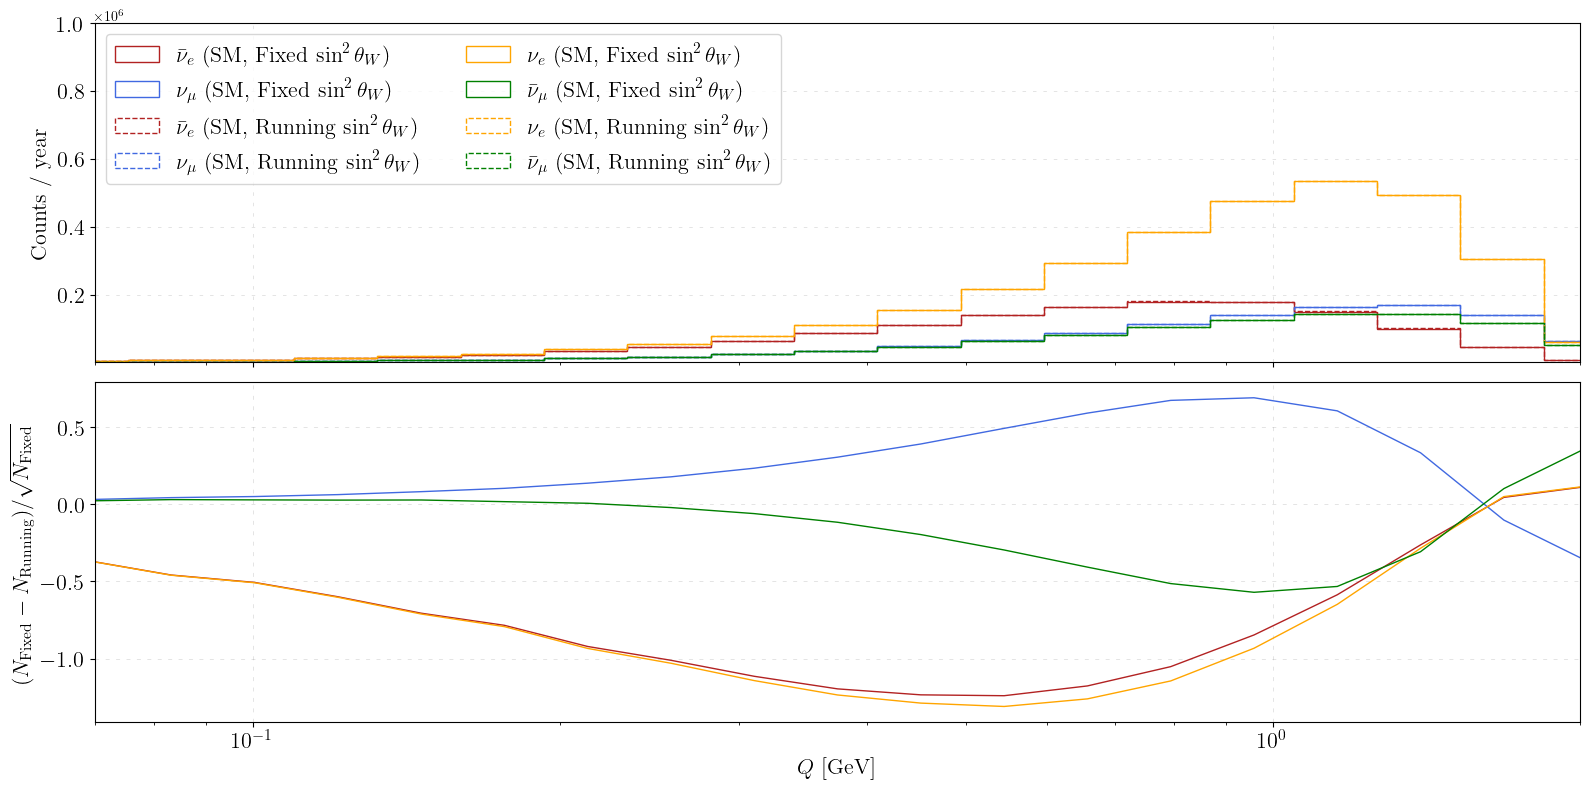

In [7]:
sw2_dat = np.genfromtxt("data/sw2_theory_curve_Q2.txt")
SSW_AT_1GEV = 0.23638198757763973


mucol_1sigma_sw2_vals = [SSW_AT_1GEV]
mucol_1sigma_Q2_vals = [1.0]
mucol_1sigma_Q2_err = [0.0004]

nuDIS = [5.0, 0.24, 0.00159]
E158 = [0.16, 0.2394, 0.00128]
APV = [2.35e-3, 0.2348, 0.002]

# Create the figure and set up the grid
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 8), sharex=True)

q_bins = np.logspace(-3, 1, 50)
q_bin_centers = (q_bins[1:] + q_bins[:-1])/2

# Top panel: Recoil energy spectrum plot

ax1.hist(1e-3*sqrt(2*M_E*nuebar_energies_10TeV), weights=nuebar_wgts_10TeV, bins=q_bins, histtype='step',
         label=r"$\bar{\nu}_e$ (SM, Fixed $\sin^2 \theta_W$)", color='firebrick')
ax1.hist(1e-3*sqrt(2*M_E*numu_energies_10TeV), weights=numu_wgts_10TeV, bins=q_bins, histtype='step',
         label=r"$\nu_\mu$ (SM, Fixed $\sin^2 \theta_W$)", color='royalblue')

ax1.hist(1e-3*sqrt(2*M_E*nuebar_energies_10TeV_running), weights=nuebar_wgts_10TeV_running, bins=q_bins, histtype='step',
         label=r"$\bar{\nu}_e$ (SM, Running $\sin^2 \theta_W$)", color='firebrick', ls='dashed')
ax1.hist(1e-3*sqrt(2*M_E*numu_energies_10TeV_running), weights=numu_wgts_10TeV_running, bins=q_bins, histtype='step',
         label=r"$\nu_\mu$ (SM, Running $\sin^2 \theta_W$)", color='royalblue', ls='dashed')

ax1.hist(1e-3*sqrt(2*M_E*nue_energies_10TeV), weights=nue_wgts_10TeV, bins=q_bins, histtype='step',
         label=r"$\nu_e$ (SM, Fixed $\sin^2 \theta_W$)", color='orange')
ax1.hist(1e-3*sqrt(2*M_E*numubar_energies_10TeV), weights=numubar_wgts_10TeV, bins=q_bins, histtype='step',
         label=r"$\bar{\nu}_\mu$ (SM, Fixed $\sin^2 \theta_W$)", color='g')

ax1.hist(1e-3*sqrt(2*M_E*nue_energies_10TeV_running), weights=nue_wgts_10TeV_running, bins=q_bins, histtype='step',
         label=r"$\nu_e$ (SM, Running $\sin^2 \theta_W$)", color='orange', ls='dashed')
ax1.hist(1e-3*sqrt(2*M_E*numubar_energies_10TeV_running), weights=numubar_wgts_10TeV_running, bins=q_bins, histtype='step',
         label=r"$\bar{\nu}_\mu$ (SM, Running $\sin^2 \theta_W$)", color='g', ls='dashed')

#ax1.text(2e-3, 370000, r"E$\nu$ES from MC Neutrinos")
ax1.legend(loc="upper left", ncol=2, fontsize=16)

ax1.set_ylabel("Counts / year", fontsize=16)
ax1.set_xlim((q_bins[0], q_bins[-1]))
ax1.set_ylim((0.1, 1e6))
#ax1.set_yscale('log')

################################################################################################

# Bottom panel: subtraction

# Collect all diffs
h_nuebar, _ = np.histogram(1e-3*sqrt(2*M_E*nuebar_energies_10TeV), weights=nuebar_wgts_10TeV, bins=q_bins)
h_nue, _ = np.histogram(1e-3*sqrt(2*M_E*nue_energies_10TeV), weights=nue_wgts_10TeV, bins=q_bins)
h_numubar, _ = np.histogram(1e-3*sqrt(2*M_E*numubar_energies_10TeV), weights=numubar_wgts_10TeV, bins=q_bins)
h_numu, _ = np.histogram(1e-3*sqrt(2*M_E*numu_energies_10TeV), weights=numu_wgts_10TeV, bins=q_bins)

h_nuebar_run, _ = np.histogram(1e-3*sqrt(2*M_E*nuebar_energies_10TeV_running), weights=nuebar_wgts_10TeV_running, bins=q_bins)
h_nue_run, _ = np.histogram(1e-3*sqrt(2*M_E*nue_energies_10TeV_running), weights=nue_wgts_10TeV_running, bins=q_bins)
h_numubar_run, _ = np.histogram(1e-3*sqrt(2*M_E*numubar_energies_10TeV_running), weights=numubar_wgts_10TeV_running, bins=q_bins)
h_numu_run, _ = np.histogram(1e-3*sqrt(2*M_E*numu_energies_10TeV_running), weights=numu_wgts_10TeV_running, bins=q_bins)


ax2.plot(q_bin_centers, (h_nuebar-h_nuebar_run)/np.sqrt(h_nuebar), color='firebrick', linewidth=1.0)
ax2.plot(q_bin_centers, (h_numu-h_numu_run)/np.sqrt(h_numu), color='royalblue', linewidth=1.0)
ax2.plot(q_bin_centers, (h_nue-h_nue_run)/np.sqrt(h_nue), color='orange', linewidth=1.0)
ax2.plot(q_bin_centers, (h_numubar-h_numubar_run)/np.sqrt(h_numubar), color='g', linewidth=1.0)



ax2.set_xscale('log')
ax2.set_xlabel(r"$Q$ [GeV]", fontsize=16)
ax2.set_ylabel(r"$(N_{\rm Fixed} - N_{\rm Running}) / \sqrt{N_{\rm Fixed}}$", fontsize=16)
#ax2.set_ylim(top=0.242)
ax2.set_xlim((7e-2, 2))

ax1.tick_params(axis="x", labelsize=16)
ax1.tick_params(axis="y", labelsize=16)
ax2.tick_params(axis="x", labelsize=16)
ax2.tick_params(axis="y", labelsize=16)

# set the grid
ax1.grid(True, linestyle='-', linewidth=0.5, alpha=0.3, color='gray', dashes=(5,10))
ax2.grid(True, linestyle='-', linewidth=0.5, alpha=0.3, color='gray', dashes=(5,10))
for line in plt.gca().xaxis.get_gridlines():
    line.set_dash_capstyle('round')
for line in plt.gca().yaxis.get_gridlines():
    line.set_dash_capstyle('round')

# Final adjustments and save
plt.tight_layout()
plt.savefig("plots/weak_mixing/EvES_spectra_vs_SSW_Running_10TeV.pdf")
plt.show()

### $\chi^2$ analysis of the running + pseudoexperiments

In [15]:
from scipy.stats import chi2

from scipy.special import gammaln

def log_pois(data, bkg, signal):
    return -2*np.sum(data * np.log(signal + bkg) - (signal + bkg) - gammaln(data + 1))


In [ ]:
np.where(h_numubar >= 10)


(array([16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
        33, 34, 35, 36, 37, 38, 39, 40]),)

In [43]:
print(h_numubar[15:-7])

ndof_sw_running = h_numubar[16:-8].shape[0]

[8.51536912e+00 1.51266596e+01 3.13734817e+01 8.00921601e+01
 1.39860973e+02 2.88931913e+02 6.95342876e+02 1.13601308e+03
 2.31980478e+03 2.77358675e+03 3.82353089e+03 6.13481379e+03
 8.04668342e+03 1.25748521e+04 1.69314020e+04 2.38929547e+04
 3.40327975e+04 4.60207197e+04 6.23320485e+04 8.16946246e+04
 1.03928883e+05 1.25584512e+05 1.42060499e+05 1.42735624e+05
 1.15995078e+05 5.16569251e+04 0.00000000e+00]


Trim the first 16 bins and last 8

In [81]:

chi2_nuebar = np.sum((h_nuebar[16:-8]-h_nuebar_run[16:-8])**2 / (h_nuebar_run[16:-8] + 1))
chi2_numu = np.sum((h_numu[16:-8]-h_numu_run[16:-8])**2 / (h_numu_run[16:-8] + 1))
chi2_nue = np.sum((h_nue[16:-8]-h_nue_run[16:-8])**2 / (h_nue_run[16:-8] + 1))
chi2_numubar = np.sum((h_numubar[16:-8]-h_numubar_run[16:-8])**2 / (h_numubar_run[16:-8] + 1))

ndof_mu_plus = (h_nue[16:-8].shape[0] + h_numubar[16:-8].shape[0])
ndof_mu_minus = (h_nuebar[16:-8].shape[0] + h_numu[16:-8].shape[0])

print("chi2 nuebar = {}, chi2_numu = {}, sum / dof = {}".format(chi2_nuebar, chi2_numu, (chi2_nuebar + chi2_numu)/ndof_sw_running/2))
print("chi2 nue = {}, chi2_numubar = {}, sum / dof = {}".format(chi2_nue, chi2_numubar, (chi2_nue + chi2_numubar)/ndof_sw_running/2))


crit_chi2_mu_plus = chi2.ppf(0.9, 2*ndof_sw_running)
crit_chi2_mu_minus = chi2.ppf(0.9, 2*ndof_sw_running)

print("crit chi^2 mu+ = {} vs. {}".format(crit_chi2_mu_plus, (chi2_nue + chi2_numubar)))

print("crit chi^2 mu- = {} vs. {}".format(crit_chi2_mu_minus, (chi2_nuebar + chi2_numu)))

print("N sigma for mu- mode = {}".format(chi2.cdf(chi2_nuebar + chi2_numu, 2*ndof_sw_running)))
print("N sigma for mu- mode = {}".format(chi2.cdf(chi2_nue + chi2_numubar, 2*ndof_sw_running)))

chi2 nuebar = 13.44273910543452, chi2_numu = 2.5139619713305335, sum / dof = 0.31913402153530107
chi2 nue = 14.658662969695106, chi2_numubar = 1.427405236350646, sum / dof = 0.32172136412091507
crit chi^2 mu+ = 63.167121005726315 vs. 16.086068206045752
crit chi^2 mu- = 63.167121005726315 vs. 15.956701076765054
N sigma for mu- mode = 1.1180978284763176e-06
N sigma for mu- mode = 1.286925372266554e-06


In [78]:

lp_nuebar = log_pois(h_nuebar_run[3:-8], 0.0, h_nuebar[3:-8])
lp_numu = log_pois(h_numu_run[3:-8], 0.0, h_numu[3:-8])
lp_nue = log_pois(h_nue_run[3:-8], 0.0, h_nue[3:-8])
lp_numubar = log_pois(h_numubar_run[3:-8], 0.0, h_numubar[3:-8])

print("chi2 nuebar = {}, chi2_numu = {}, sum / dof = {}".format(lp_nuebar, lp_numu, (lp_nuebar + lp_numu)))
print("chi2 nue = {}, chi2_numubar = {}, sum / dof = {}".format(lp_nue, lp_numubar, (lp_nue + lp_numubar)))


crit_chi2_mu_plus = chi2.ppf(0.9, ndof_mu_plus)
crit_chi2_mu_minus = chi2.ppf(0.9, ndof_mu_minus)

print("crit chi^2 mu+ = {} vs. {}".format(crit_chi2_mu_plus, (lp_nue + lp_numubar)))

print("crit chi^2 mu- = {} vs. {}".format(crit_chi2_mu_minus, (lp_nuebar + lp_numu)))


print("N sigma for mu- mode = {}".format(chi2.cdf(lp_nuebar + lp_numu, 2*ndof_mu_minus)))
print("N sigma for mu- mode = {}".format(chi2.cdf(lp_nue + lp_numubar, 2*ndof_mu_plus)))

chi2 nuebar = 320.32036477181776, chi2_numu = 282.4298561769111, sum / dof = 602.7502209487288
chi2 nue = 332.67782635539174, chi2_numubar = 280.2240836345402, sum / dof = 612.9019099899319
crit chi^2 mu+ = 63.167121005726315 vs. 612.9019099899319
crit chi^2 mu- = 63.167121005726315 vs. 602.7502209487288
N sigma for mu- mode = 1.0
N sigma for mu- mode = 1.0


### Pseudoexperiments

335.0739251702307


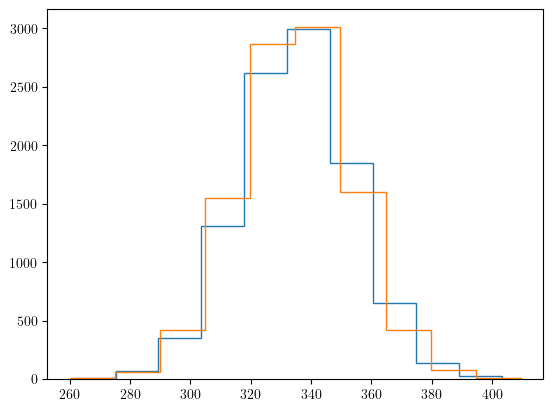

In [ ]:
from scipy.stats import norm

nuebar_pdata = norm.rvs(loc=h_nuebar_run[18:19], scale=np.sqrt(h_nuebar_run[18:19]), size=(10000, 2))
print(h_nuebar_run[18])

plt.hist(nuebar_pdata[:,0], histtype='step')
plt.hist(nuebar_pdata[:,1], histtype='step')
plt.show()


(100000,)
104.64471319328351
17.43854171978299
130.7167354445865
22.25964321372587


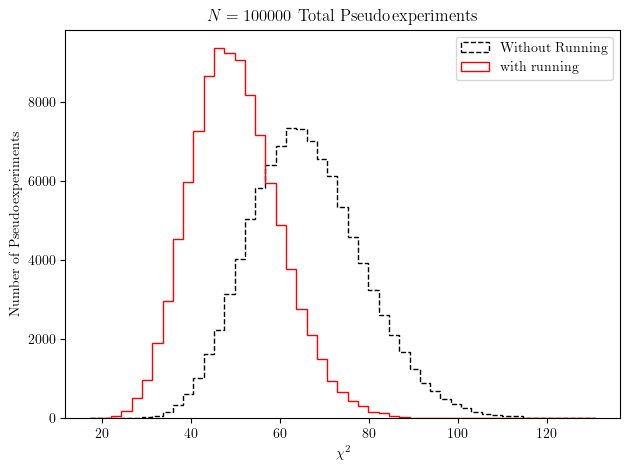

Median for no running =  65.28762798422979
Median for running hyp =  49.35107746946276
90% quantile for running hyp =  63.167121005726315


In [77]:
from scipy.stats import norm

# run 10,000 pseudoexperiments
nuebar_pdata = norm.rvs(loc=h_nuebar_run[16:-8], scale=np.sqrt(h_nuebar_run[16:-8]), size=(100000, ndof_sw_running))
numu_pdata = norm.rvs(loc=h_numu_run[16:-8], scale=np.sqrt(h_numu_run[16:-8]), size=(100000, ndof_sw_running))

chi2_pdata_norunning = np.sum(np.power(h_numu[16:-8] - numu_pdata, 2)/h_numu[16:-8], axis=1) \
    + np.sum(np.power(h_nuebar[16:-8] - nuebar_pdata, 2)/h_nuebar[16:-8], axis=1)
chi2_pdata_running = np.sum(np.power(h_numu_run[16:-8] - numu_pdata, 2)/h_numu_run[16:-8], axis=1) \
    + np.sum(np.power(h_nuebar_run[16:-8] - nuebar_pdata, 2)/h_nuebar_run[16:-8], axis=1)

print(chi2_pdata_norunning.shape)

print(max(chi2_pdata_running))
print(min(chi2_pdata_running))

print(max(chi2_pdata_norunning))
print(min(chi2_pdata_norunning))

chi2_bins = np.linspace(min(chi2_pdata_running), max(chi2_pdata_norunning), 50)


plt.hist(chi2_pdata_norunning, bins=chi2_bins, label="Without Running", color='k', histtype='step', ls='dashed')
plt.hist(chi2_pdata_running, bins=chi2_bins, label="with running", color='r', histtype='step')
plt.legend()
plt.xlabel(r"$\chi^2$")
plt.ylabel("Number of Pseudoexperiments")
plt.title(r"$N = 100000$ Total Pseudoexperiments")
plt.tight_layout()
plt.show()

median_running = np.median(chi2_pdata_running)
median_norunning = np.median(chi2_pdata_norunning)

print("Median for no running = ", median_norunning)
print("Median for running hyp = ", median_running)

print("90% quantile for running hyp = ", chi2.ppf(0.9, 2*ndof_sw_running))
